In [1]:
#Un comment the below only if you run this ipynb file in google colab
#from google.colab import files
#uploaded=files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import csv
import math
import seaborn as sns
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sdss_df=pd.read_excel("sdss_dataset.xlsx")

In [ ]:
sdss_df.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err',
       'morphology', 'agni'],
      dtype='object')

In [ ]:
sdss_df.describe()

objid     specobjid             ra            dec  \
count  1.000000e+05  1.000000e+05  100000.000000  100000.000000   
mean   1.237659e+18  2.303595e+18     180.577802      23.472475   
std    6.103756e+12  2.531359e+18      75.751994      21.140744   
min    1.237646e+18  2.994897e+17       0.008745     -11.244273   
25%    1.237655e+18  8.130687e+17     138.741880       3.120118   
50%    1.237659e+18  1.457564e+18     181.492972      20.913596   
75%    1.237663e+18  2.367902e+18     223.851863      42.259965   
max    1.237681e+18  1.412691e+19     359.997922      68.695258   

                   u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       18.518622      17.258221      16.821739      16.362611   
std       105.082004     105.069066      95.035474     100.171155   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%        18.762215      17.505868      16.898845      16.527097   
50%        19.349715      18.072640      17.459080      17.091385   
75%        20.079470      18.656182      17.926918      17.592650   
max        30.960000      30.420980      31.173560      30.562360   

                   z    modelFlux_u  ...       psfMag_z        expAB_u  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean       15.850865      30.683321  ...      17.435735      -0.603667   
std       114.206165      76.552859  ...     114.218604     104.870665   
min     -9999.000000     -47.451720  ...   -9999.000000   -9999.000000   
25%        16.281327       9.288132  ...      17.991602       0.299999   
50%        16.861105      18.195690  ...      18.563315       0.508688   
75%        17.453848      31.259628  ...      19.299430       0.699907   
max        28.553240    7915.306000  ...      27.043280       1.000000   

             expAB_g        expAB_r        expAB_i        expAB_z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.522111      -0.309462      -0.410153      -0.740964   
std       104.871474      94.860919      99.991654     114.005927   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%         0.398705       0.418789       0.418656       0.381288   
50%         0.588335       0.604795       0.604254       0.575397   
75%         0.768804       0.773924       0.773119       0.752311   
max         1.000000       0.999999       1.000000       0.999998   

            redshift   redshift_err     morphology           agni  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.116753       0.000179       0.990950       0.499840  
std         0.100169       0.052189       0.816355       0.500002  
min        -0.000833       0.000002       0.000000       0.000000  
25%         0.055836       0.000008       0.000000       0.000000  
50%         0.085850       0.000011       1.000000       0.000000  
75%         0.135148       0.000015       2.000000       1.000000  
max         0.572899      16.503710       2.000000       1.000000  

[8 rows x 43 columns]

In [ ]:
vhbei=sdss_df

HANDLING MISSING VALUES
In the dataset "-9999" is used to represent the null values

In [ ]:
sdss_df.replace(-9999.0,np.nan,inplace=True)
sdss_df.isnull().sum()

objid              0
specobjid          0
ra                 0
dec                0
u                 11
g                 11
r                  9
i                 10
z                 13
modelFlux_u        0
modelFlux_g        0
modelFlux_r        0
modelFlux_i        0
modelFlux_z        0
petroRad_u         0
petroRad_g         0
petroRad_i         0
petroRad_r         0
petroRad_z         0
petroFlux_u        0
petroFlux_g        0
petroFlux_i        0
petroFlux_r        0
petroFlux_z        0
petroR50_u      1570
petroR50_g       154
petroR50_i       131
petroR50_r        68
petroR50_z       923
psfMag_u          11
psfMag_r           9
psfMag_g          11
psfMag_i          10
psfMag_z          13
expAB_u           11
expAB_g           11
expAB_r            9
expAB_i           10
expAB_z           13
class              0
subclass           0
redshift           0
redshift_err       0
morphology         0
agni               0
dtype: int64

In [ ]:
null_col=sdss_df.columns[sdss_df.isnull().any()].tolist()
print(null_col)

['u', 'g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z']


In [ ]:
#Replacing null values with mode
for i in null_col:
    sdss_df[i].fillna(sdss_df[i].mode()[0],inplace=True)

In [ ]:
#sdss_df.dropna(inplace=True)

In [ ]:
sdss_df.describe()

objid     specobjid             ra            dec  \
count  1.000000e+05  1.000000e+05  100000.000000  100000.000000   
mean   1.237659e+18  2.303595e+18     180.577802      23.472475   
std    6.103756e+12  2.531359e+18      75.751994      21.140744   
min    1.237646e+18  2.994897e+17       0.008745     -11.244273   
25%    1.237655e+18  8.130687e+17     138.741880       3.120118   
50%    1.237659e+18  1.457564e+18     181.492972      20.913596   
75%    1.237663e+18  2.367902e+18     223.851863      42.259965   
max    1.237681e+18  1.412691e+19     359.997922      68.695258   

                   u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       19.621221      18.360874      17.723881      17.364947   
std         1.526681       1.546639       1.530125       1.553336   
min        12.753830      11.822230      11.245440      10.711590   
25%        18.762520      17.506115      16.899070      16.527330   
50%        19.350015      18.072760      17.459205      17.091615   
75%        20.079930      18.656610      17.927477      17.593157   
max        30.960000      30.420980      31.173560      30.562360   

                   z    modelFlux_u  ...       psfMag_z        expAB_u  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean       17.153703      30.683321  ...      18.738572       0.496229   
std         1.608050      76.552859  ...       1.139052       0.253769   
min        10.255130     -47.451720  ...      14.304590       0.050000   
25%        16.281987       9.288132  ...      17.991950       0.299999   
50%        16.861280      18.195690  ...      18.563665       0.508688   
75%        17.454690      31.259628  ...      19.299835       0.699907   
max        28.553240    7915.306000  ...      27.043280       1.000000   

             expAB_g        expAB_r        expAB_i        expAB_z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.577784       0.590452       0.589752       0.558913   
std         0.234042       0.225886       0.226396       0.240544   
min         0.050000       0.050000       0.050000       0.050000   
25%         0.398705       0.418789       0.418656       0.381288   
50%         0.588335       0.604795       0.604254       0.575397   
75%         0.768804       0.773924       0.773119       0.752311   
max         1.000000       0.999999       1.000000       0.999998   

            redshift   redshift_err     morphology           agni  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.116753       0.000179       0.990950       0.499840  
std         0.100169       0.052189       0.816355       0.500002  
min        -0.000833       0.000002       0.000000       0.000000  
25%         0.055836       0.000008       0.000000       0.000000  
50%         0.085850       0.000011       1.000000       0.000000  
75%         0.135148       0.000015       2.000000       1.000000  
max         0.572899      16.503710       2.000000       1.000000  

[8 rows x 43 columns]

In [ ]:
sdss_df.shape

(100000, 45)

redf=[
    'u', 'g', 'r', 'i', 'z',  # main photometric magnitudes
    'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
    'petroRad_r', 'petroRad_i', 'petroRad_z',  # representative radial sizes
    'expAB_r', 'expAB_i', 'expAB_z'  # shape
]


In [ ]:
sdss_df

objid            specobjid          ra        dec  \
0      1237646587710660096  8175185722644639744   82.038679   0.847177   
1      1237646588247539968  8175186822156269568   82.138894   1.063072   
2      1237646588247539968  8175187097034179584   82.028510   1.104003   
3      1237648702973080064   332152325571372992  198.544469  -1.097059   
4      1237648702973139968   332154249716721024  198.706864  -1.046217   
...                    ...                  ...         ...        ...   
99995  1237667782852800000  3130040850139080192  228.558321  16.759520   
99996  1237667783343859968  5077945562323760128  119.601880  10.351615   
99997  1237667783392750080  2834003941597929984  235.609200  15.242749   
99998  1237667783392819968  2834003391842109952  235.789986  15.189821   
99999  1237667783922540032  6641903828970260480  219.376185  19.766648   

              u         g         r         i         z  modelFlux_u  ...  \
0      21.73818  20.26633  19.32409  18.64037  18.23833     2.007378  ...   
1      20.66761  19.32016  18.67888  18.24693  18.04122     5.403369  ...   
2      23.63531  21.19671  19.92297  19.31443  18.68396     0.295693  ...   
3      20.12374  18.41520  17.47202  17.05297  16.72423     8.920645  ...   
4      24.63466  25.11438  18.37762  18.13383  17.78497     0.000000  ...   
...         ...       ...       ...       ...       ...          ...  ...   
99995  20.09288  18.25375  17.28985  16.82903  16.43054     9.177956  ...   
99996  22.09939  20.82547  19.02462  18.43225  17.96795     1.432706  ...   
99997  19.31622  18.14944  17.45517  17.04435  16.77127    18.770960  ...   
99998  19.03856  18.17619  17.53119  17.05532  16.85166    24.241610  ...   
99999  20.63641  20.12450  19.96307  19.35898  19.51870     5.561124  ...   

        expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  redshift  \
0      0.311864  0.289370  0.270588  0.187182  GALAXY  STARFORMING  0.067749   
1      0.516876  0.517447  0.552297  0.636966  GALAXY  STARFORMING  0.105118   
2      0.417137  0.506950  0.549881  0.370166  GALAXY  STARFORMING  0.234089   
3      0.356827  0.389345  0.388160  0.416660  GALAXY  STARFORMING  0.110825   
4      0.050000  0.050000  0.050000  0.149973  GALAXY  STARFORMING  0.136658   
...         ...       ...       ...       ...     ...          ...       ...   
99995  0.308447  0.318548  0.313944  0.361409  GALAXY  STARFORMING  0.116555   
99996  0.705830  0.772447  0.738316  0.611691  GALAXY  STARFORMING  0.366410   
99997  0.363766  0.367104  0.373286  0.389484  GALAXY  STARFORMING  0.127064   
99998  0.930673  0.884711  0.859936  0.873763  GALAXY  STARFORMING  0.116330   
99999  0.304459  0.241673  0.258522  0.364446  GALAXY    STARBURST  0.100121   

       redshift_err  morphology  agni  
0          0.000015           1     0  
1          0.000010           0     0  
2          0.000030           0     1  
3          0.000030           1     1  
4          0.000021           1     0  
...             ...         ...   ...  
99995      0.000022           1     0  
99996      0.000093           1     0  
99997      0.000010           2     1  
99998      0.000011           0     0  
99999      0.000007           0     1  

[100000 rows x 45 columns]

CATEGORIZING THE COLUMMNS

In [ ]:
#Not useful for prediction 'objid', 'specobjid'
obj=['objid', 'specobjid']
coordi=['ra', 'dec']    #co-ordinates
mag=['u', 'g', 'r', 'i', 'z']
modelf=['modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i','modelFlux_z']
petror=['petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r','petroRad_z']
petrof=['petroFlux_u', 'petroFlux_g', 'petroFlux_i','petroFlux_r', 'petroFlux_z']
petror50=['petroR50_u', 'petroR50_g', 'petroR50_i','petroR50_r', 'petroR50_z']
psfmag=['psfMag_u', 'psfMag_r', 'psfMag_g','psfMag_i', 'psfMag_z']
expab=['expAB_u', 'expAB_g', 'expAB_r', 'expAB_i','expAB_z']
cls=['class', 'subclass']
red=['redshift', 'redshift_err']

In [ ]:
red_df=sdss_df.drop(columns=obj+['redshift_err','class']+coordi+modelf+petror+petrof+petror50+psfmag)
rcol=list(red_df.columns)
rcol = list(red_df.columns)    # All columns
rnum = rcol.copy()             # Create a copy
for col in ['subclass', 'morphology', 'agni']:
    if col in rnum:
        rnum.remove(col)

In [ ]:
#created a function for category column info

def cat_info(col,df):
    print(f'Unique values in {col}:{df[col].nunique()}')
    print(f'Missing values count for {col}:{df[col].isnull().sum()}')
    print(f'Mode of {col} : {sdss_df[col].mode()[0]}')
    value_count=sdss_df[col].value_counts()
    value_per=sdss_df[col].value_counts(normalize=True)*100

#created a function for category column visualization
def visual(col,df):
    value_count=sdss_df[col].value_counts()
    value_per=sdss_df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.title(f'Value count of {col}')

    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')

def main_cat(col,df):
    cat_info(col,df)
    visual(col,df)

In [ ]:
#created a function for numericat column info[col=single column, df= dataset in practice]

def num_info(col,df):
    print(col)
    print(f'Mean: {df[col].mean()}')
    print(f'skewness: {df[col].skew()}')
    print(f'kurtos: {df[col].kurt()}')

#created a function for numerical column visualization
def num_visual(col,df):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')

def main_num(col,df):
    num_info(col,df)
    num_visual(col,df)

Unique values in subclass:2
Missing values count for subclass:0
Mode of subclass : STARFORMING


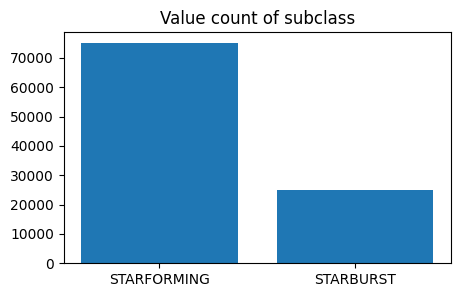

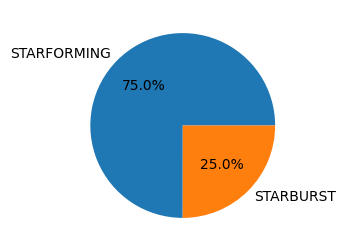

In [ ]:
main_cat('subclass',red_df)


Unique values in morphology:3
Missing values count for morphology:0
Mode of morphology : 0


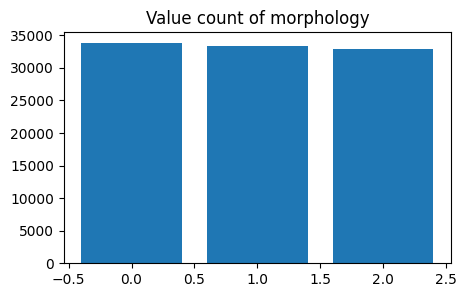

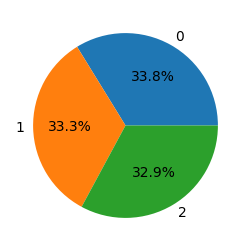

In [ ]:
main_cat('morphology',red_df)

Unique values in agni:2
Missing values count for agni:0
Mode of agni : 0


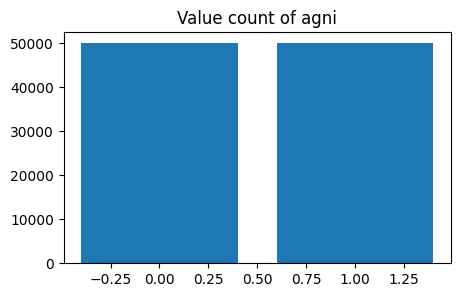

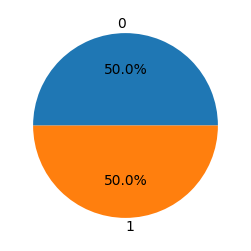

In [ ]:
main_cat('agni',red_df)

In [ ]:
red_df.replace({'subclass': {'STARFORMING':0,'STARBURST':1}},inplace=True)


u
Mean: 19.6212214355
skewness: 1.0415252504016923
kurtos: 2.0715686853018425
g
Mean: 18.360874072899996
skewness: 0.9534311901473268
kurtos: 1.2770539874967768
r
Mean: 17.723880837800003
skewness: 1.0157082308884677
kurtos: 1.625836437324192
i
Mean: 17.3649473522
skewness: 1.1164723728917951
kurtos: 1.9131781479163137
z
Mean: 17.153702872199997
skewness: 1.1876484604907895
kurtos: 2.10684748346459
expAB_u
Mean: 0.4962287909078
skewness: -0.10263938313464782
kurtos: -0.9525284406352887
expAB_g
Mean: 0.5777842351884999
skewness: -0.2074890300544481
kurtos: -0.8295222261823847
expAB_r
Mean: 0.5904521455885999
skewness: -0.21968329732632985
kurtos: -0.8116258904362206
expAB_i
Mean: 0.5897518069530999
skewness: -0.23064231957355824
kurtos: -0.7835922194325113
expAB_z
Mean: 0.5589129696025
skewness: -0.2659346912264485
kurtos: -0.7497312951595827
redshift
Mean: 0.11675337557336508
skewness: 2.07776986751915
kurtos: 4.4804480516273255


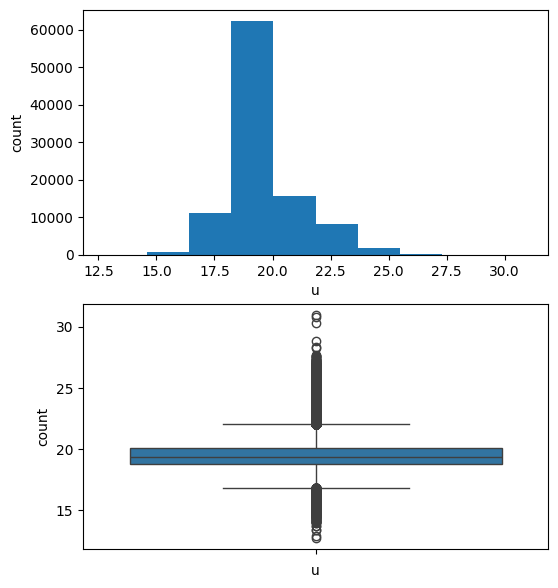

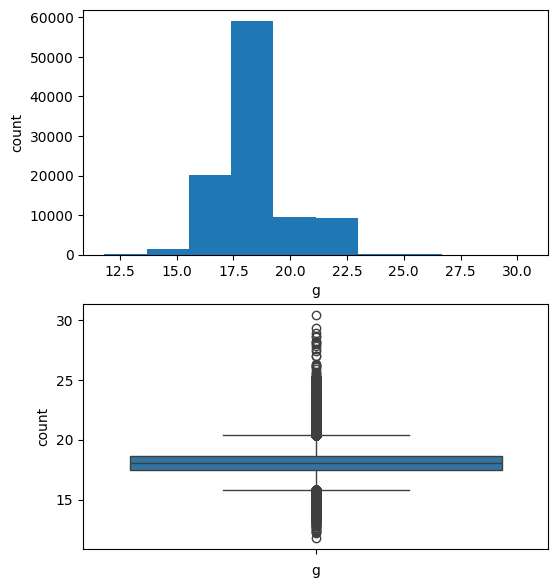

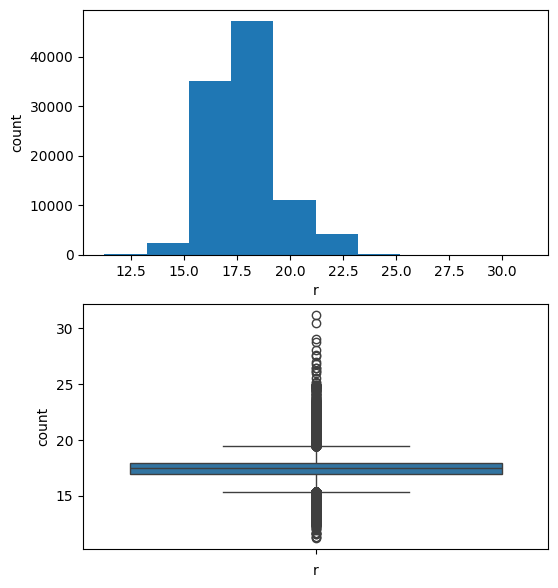

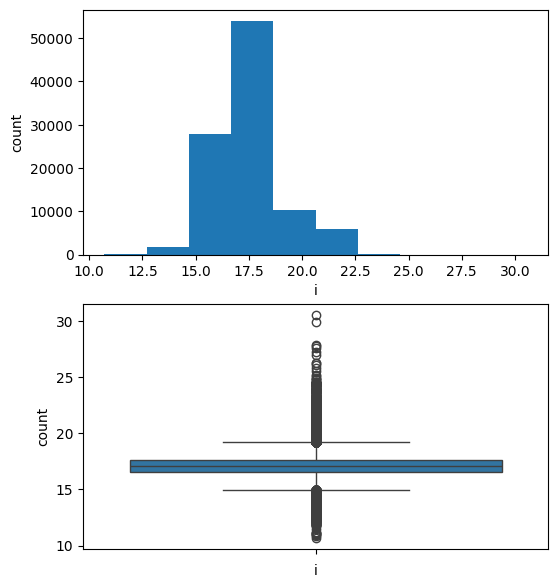

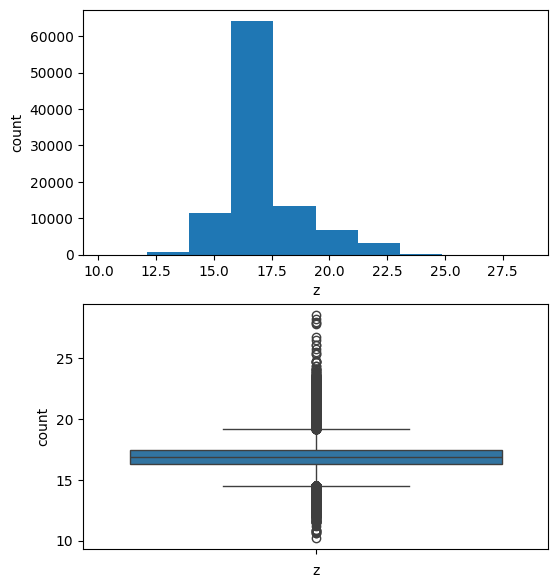

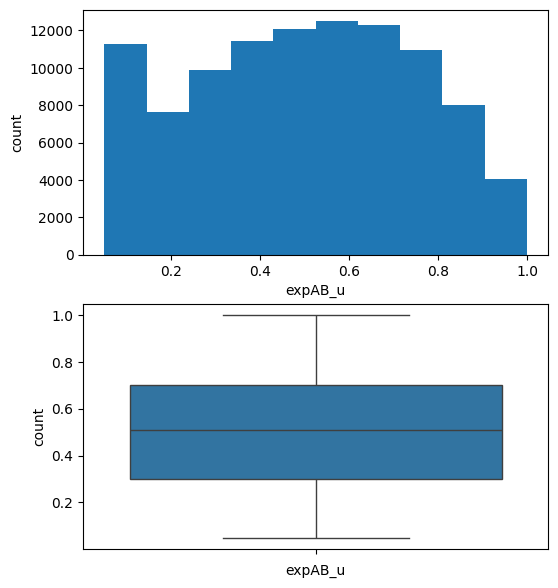

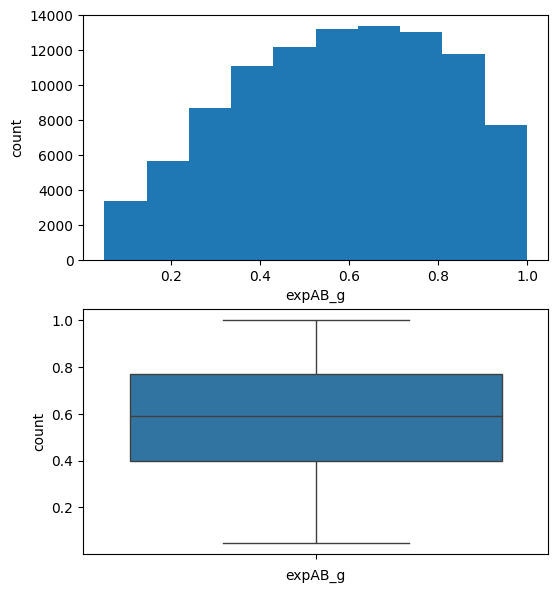

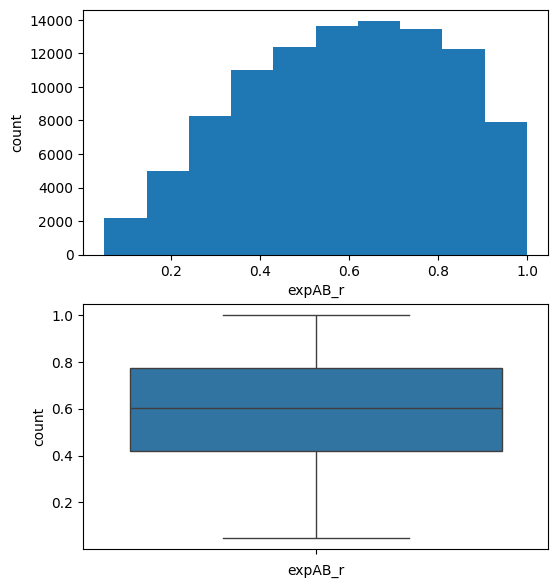

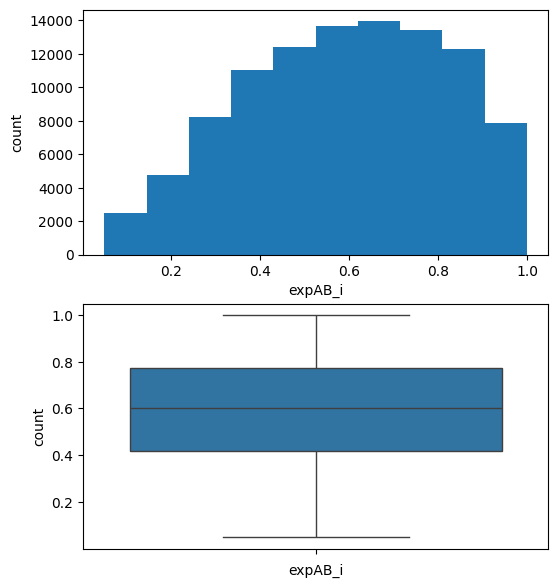

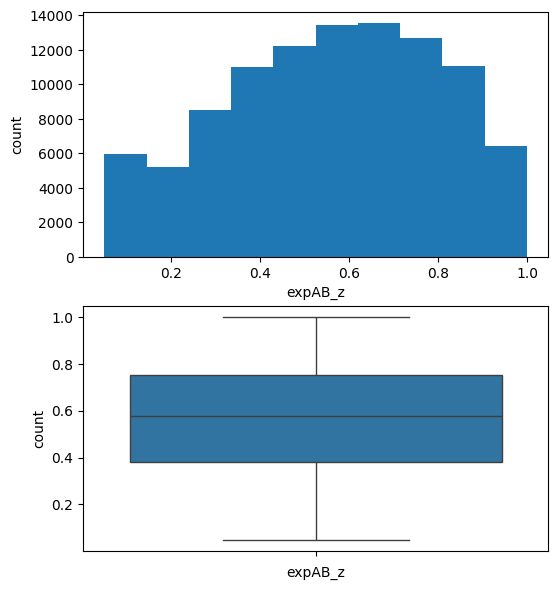

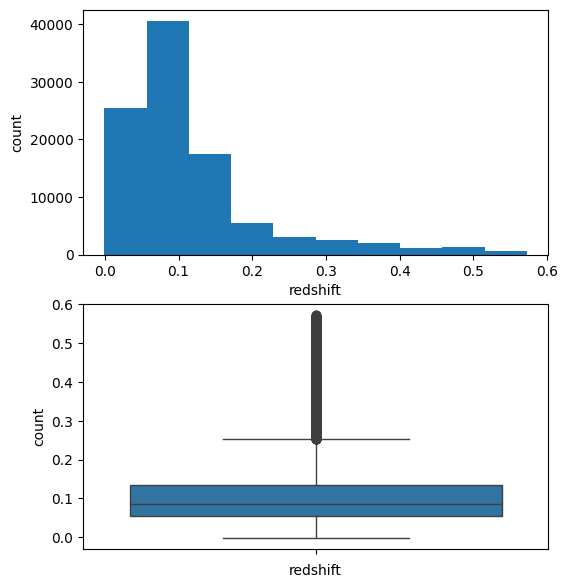

In [ ]:
for i in rnum:
  main_num(i,red_df)

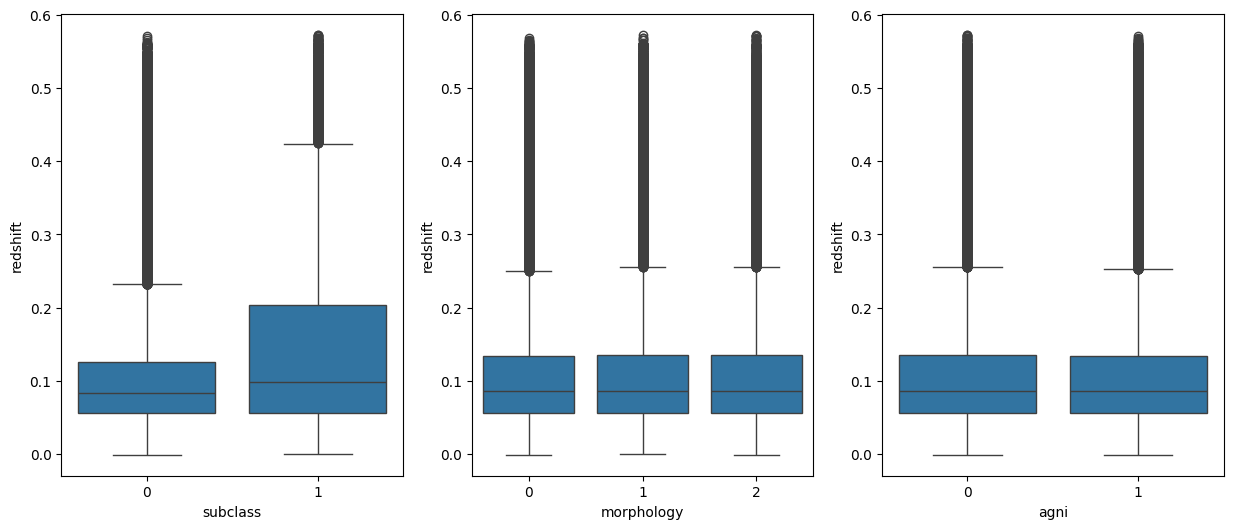

In [ ]:
cat=['subclass','morphology','agni']
red=['redshift']
fig,axs=plt.subplots(1,3,figsize=(15,6))
axs=axs.ravel()
j=0
for i in cat:
  sns.boxplot(y='redshift',x=i,data=red_df,ax=axs[j])
  j+=1
plt.show()

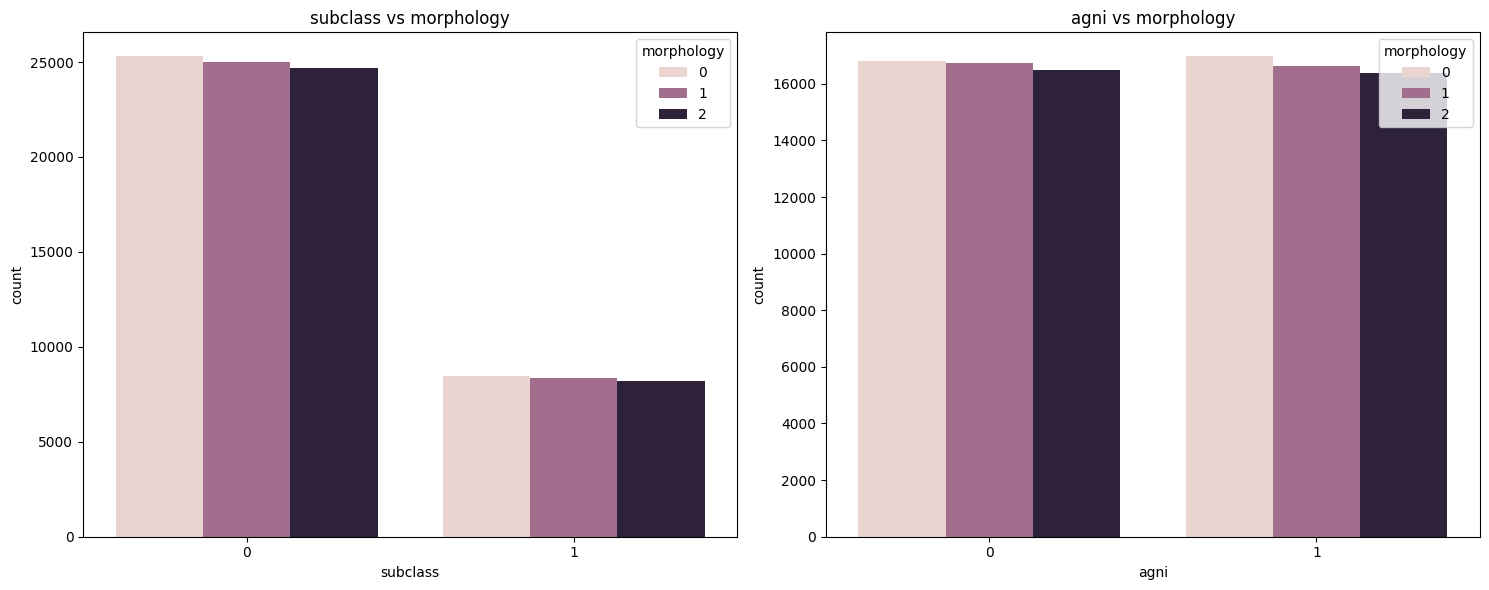

In [ ]:
ca = ['subclass', 'agni']
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()  # Flatten the axes array

for j, i in enumerate(ca):
    sns.countplot(x=i, hue='morphology', data=red_df, ax=axs[j])
    axs[j].set_title(f"{i} vs morphology")
    axs[j].tick_params(axis='x')

plt.tight_layout()
plt.show()

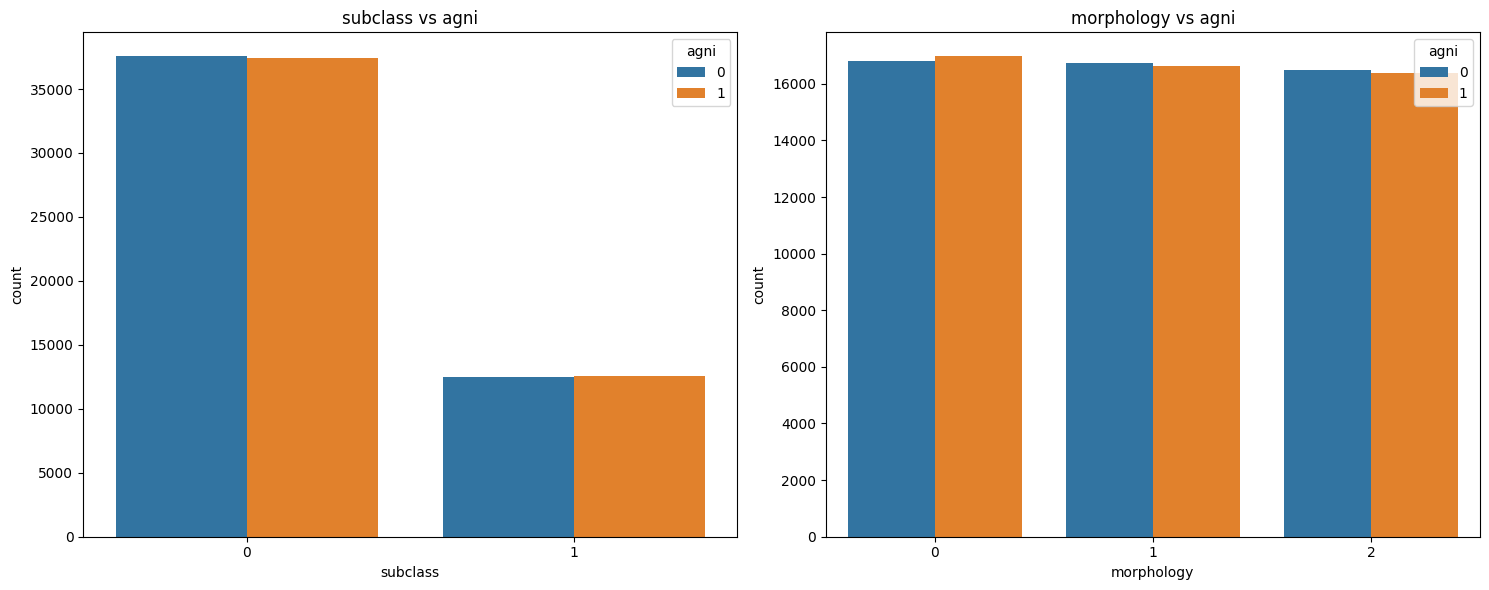

In [ ]:
ca = ['subclass', 'morphology']
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()  # Flatten the axes array

for j, i in enumerate(ca):
    sns.countplot(x=i, hue='agni', data=red_df, ax=axs[j])
    axs[j].set_title(f"{i} vs agni")
    axs[j].tick_params(axis='x')

plt.tight_layout()
plt.show()

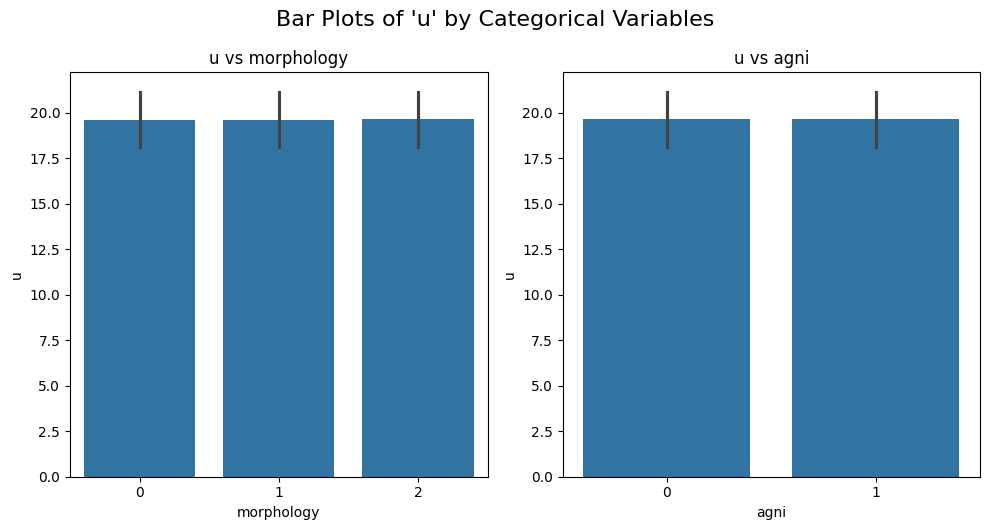

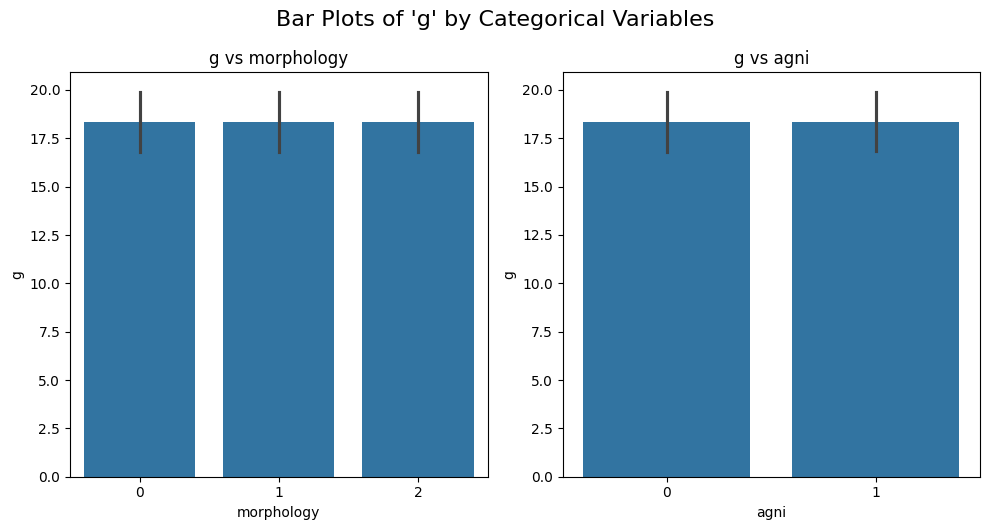

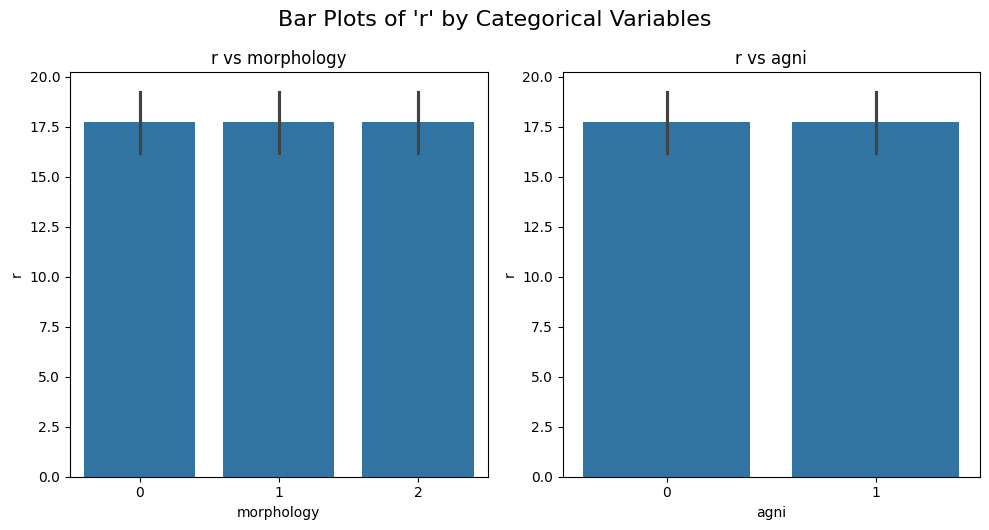

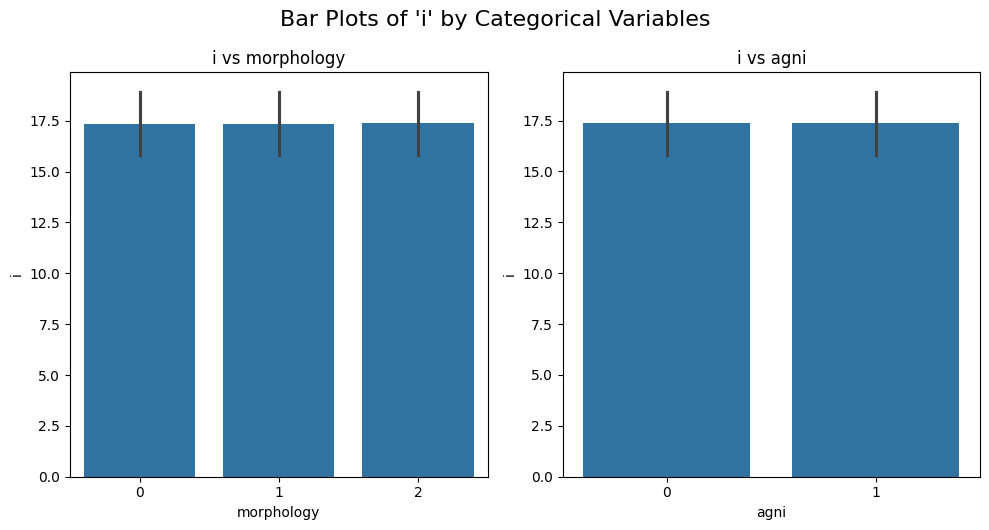

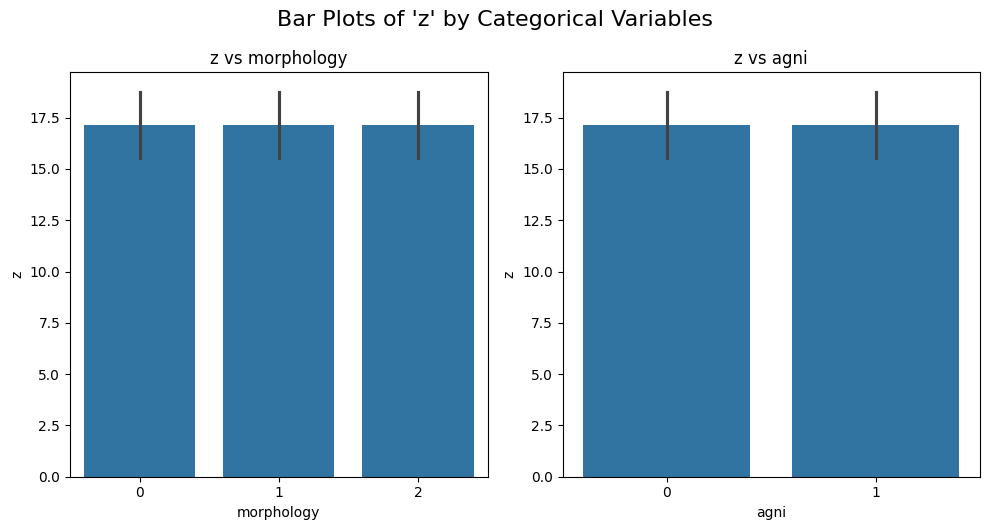

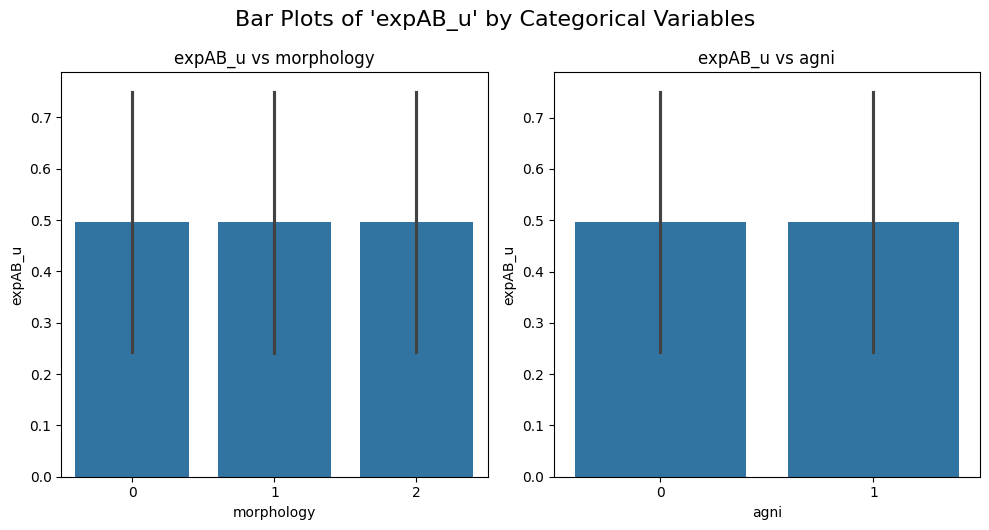

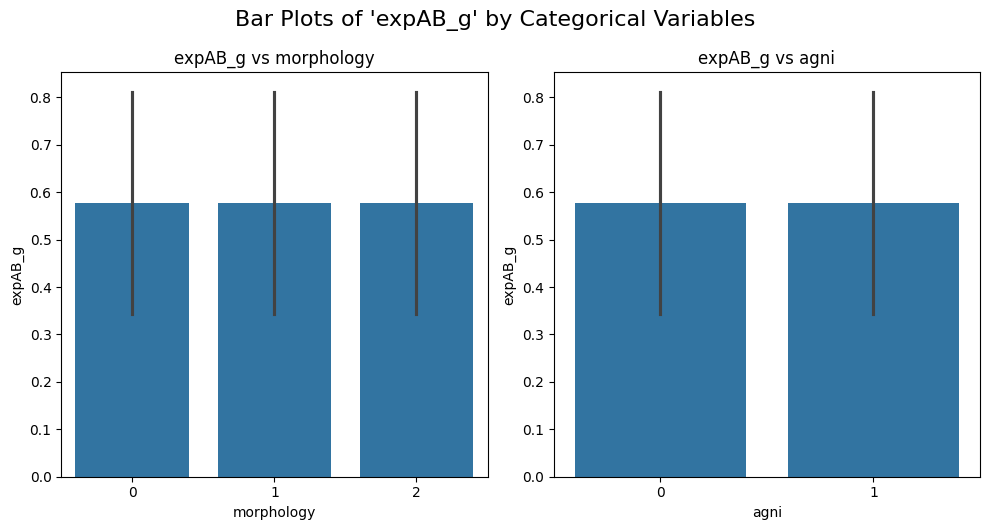

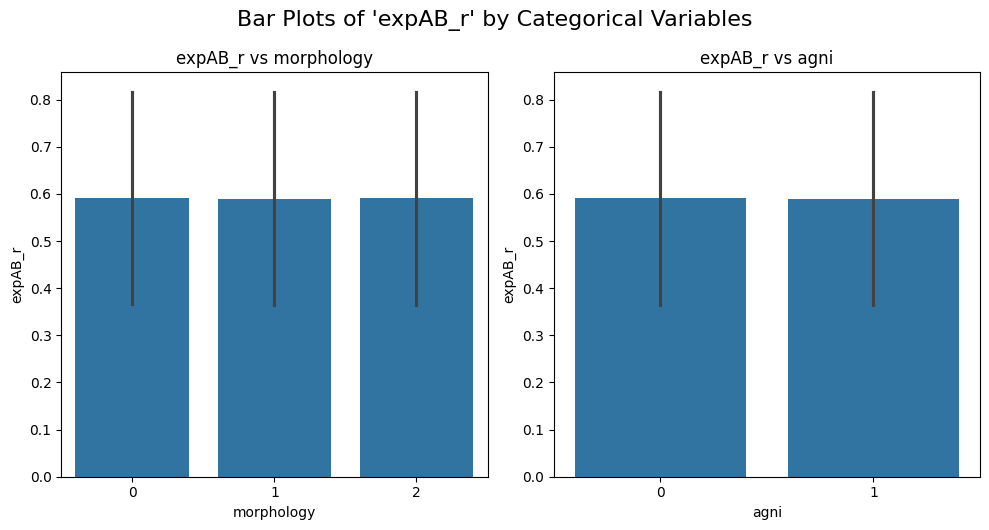

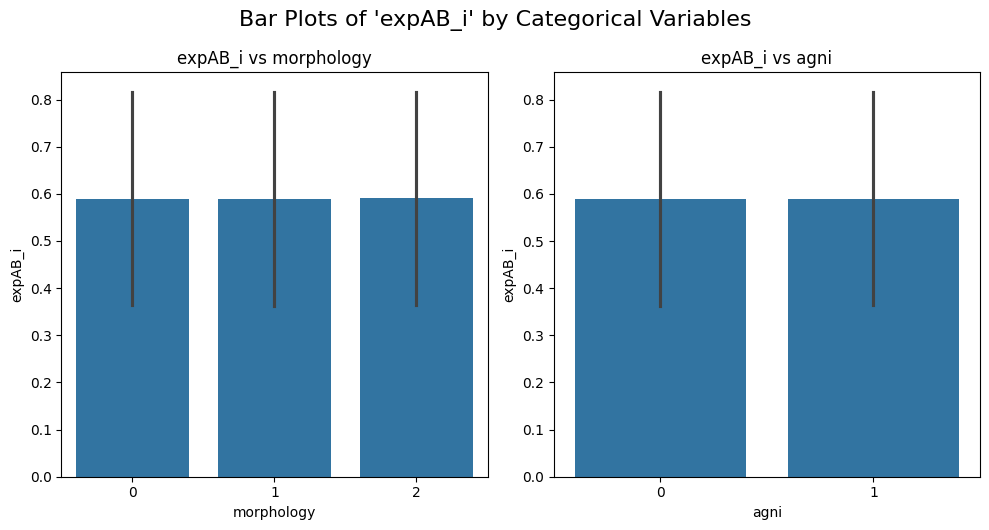

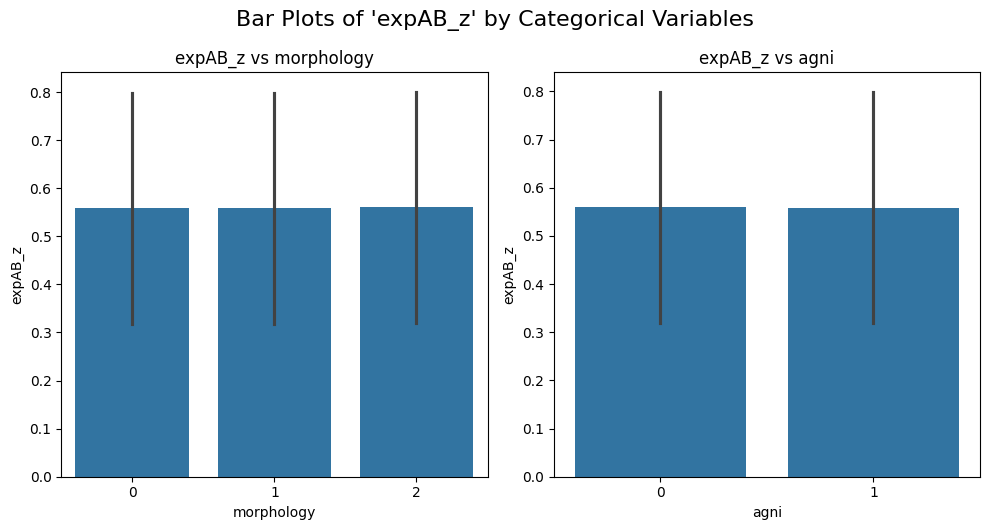

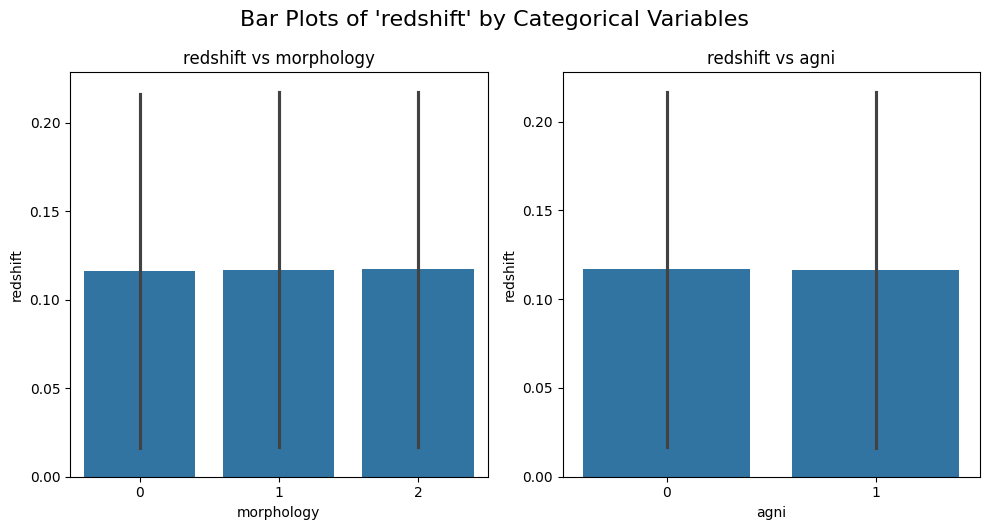

In [ ]:
tar=['morphology','agni']
for j in rnum:
    fig, axs = plt.subplots(1, len(tar), figsize=(5 * len(tar), 5))
    axs = axs.ravel()

    for i, cat_col in enumerate(tar):
        sns.barplot(x=cat_col, y=j, data=red_df, ax=axs[i], estimator=np.mean, ci='sd')
        axs[i].set_title(f"{j} vs {cat_col}")
        axs[i].tick_params(axis='x')

    plt.tight_layout()
    plt.suptitle(f"Bar Plots of '{j}' by Categorical Variables", y=1.05, fontsize=16)
    plt.show()


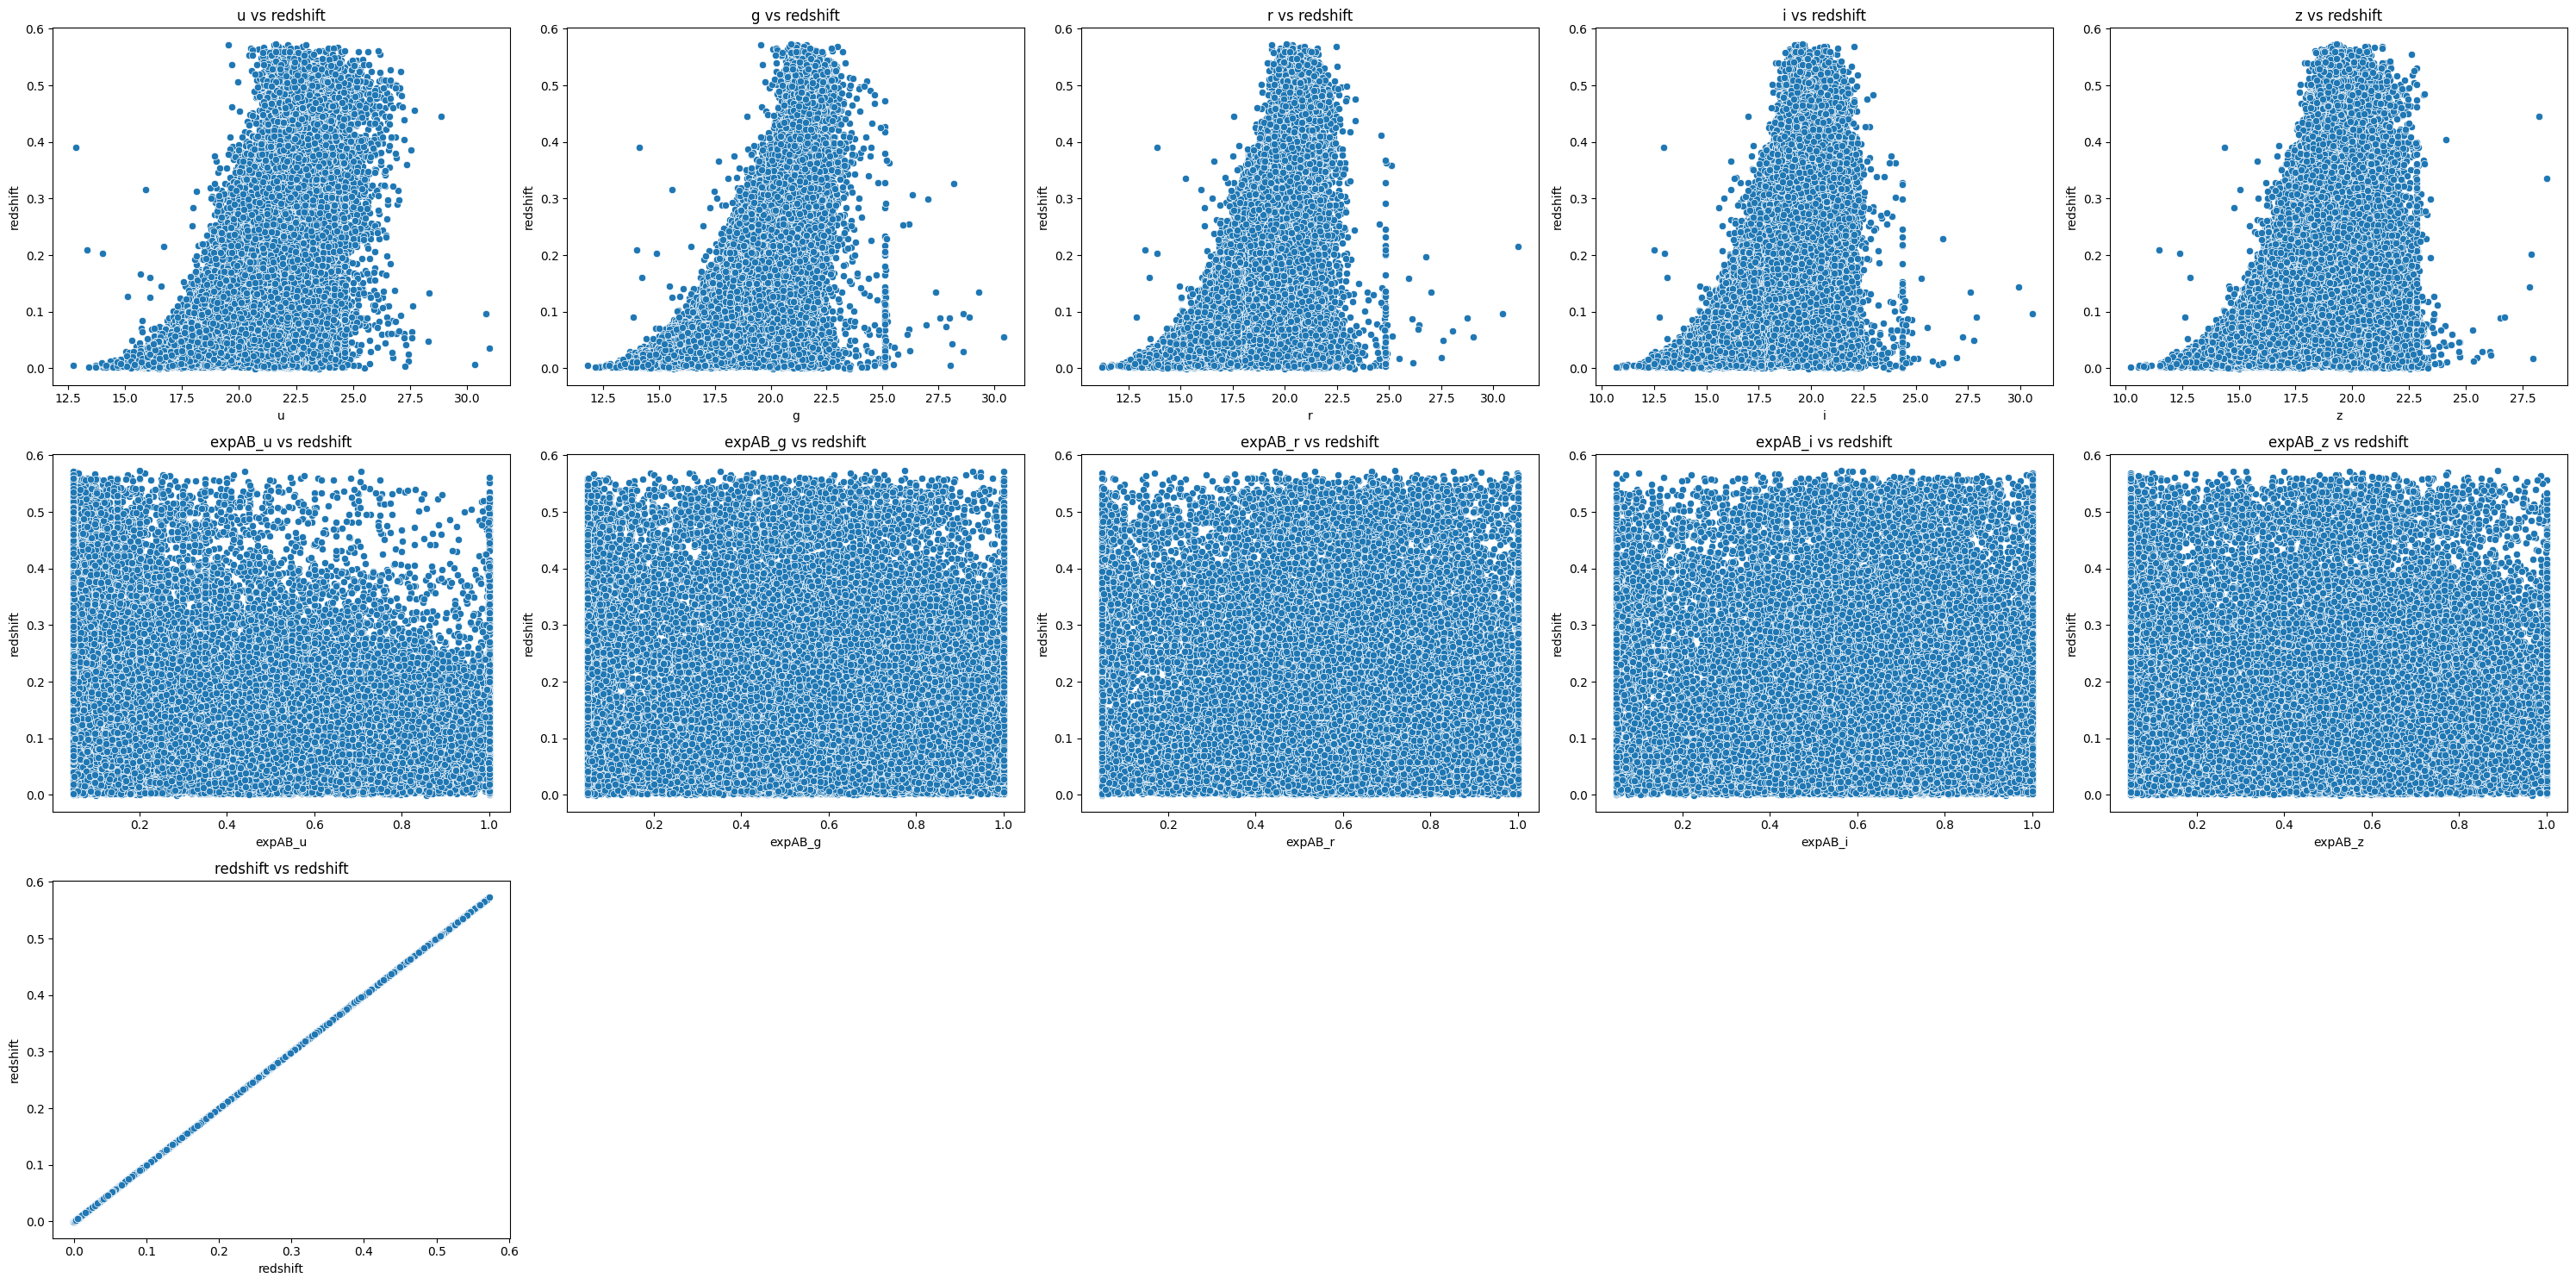

In [ ]:
n_cols = 5
n_plots = len(rnum)
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axs = axs.ravel()  # flatten for easy indexing

for i, col in enumerate(rnum):
    sns.scatterplot(x=col, y='redshift', data=red_df, ax=axs[i])
    axs[i].set_title(f"{col} vs redshift")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('redshift')

# Turn off empty axes if number of plots < n_rows * n_cols
for i in range(len(rnum), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()
plt.show()

In [256]:
sns.scatterplot(data=df, x='redshift', y='u', hue='subclass')


ValueError: Could not interpret value `u` for `x`. An entry with this name does not appear in `data`.

In [ ]:
#Statistical description of dataset
red_df.describe()

u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       19.621221      18.360874      17.723881      17.364947   
std         1.526681       1.546639       1.530125       1.553336   
min        12.753830      11.822230      11.245440      10.711590   
25%        18.762520      17.506115      16.899070      16.527330   
50%        19.350015      18.072760      17.459205      17.091615   
75%        20.079930      18.656610      17.927477      17.593157   
max        30.960000      30.420980      31.173560      30.562360   

                   z        expAB_u        expAB_g        expAB_r  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       17.153703       0.496229       0.577784       0.590452   
std         1.608050       0.253769       0.234042       0.225886   
min        10.255130       0.050000       0.050000       0.050000   
25%        16.281987       0.299999       0.398705       0.418789   
50%        16.861280       0.508688       0.588335       0.604795   
75%        17.454690       0.699907       0.768804       0.773924   
max        28.553240       1.000000       1.000000       0.999999   

             expAB_i        expAB_z       subclass       redshift  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.589752       0.558913       0.250070       0.116753   
std         0.226396       0.240544       0.433055       0.100169   
min         0.050000       0.050000       0.000000      -0.000833   
25%         0.418656       0.381288       0.000000       0.055836   
50%         0.604254       0.575397       0.000000       0.085850   
75%         0.773119       0.752311       1.000000       0.135148   
max         1.000000       0.999998       1.000000       0.572899   

          morphology           agni  
count  100000.000000  100000.000000  
mean        0.990950       0.499840  
std         0.816355       0.500002  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         2.000000       1.000000  
max         2.000000       1.000000

IQR METOOD TO REMOVE OUTLIERS

In [ ]:
red_df.dtypes

u             float64
g             float64
r             float64
i             float64
z             float64
expAB_u       float64
expAB_g       float64
expAB_r       float64
expAB_i       float64
expAB_z       float64
subclass        int64
redshift      float64
morphology      int64
agni            int64
dtype: object

In [ ]:
q1=red_df.quantile(0.01)
q3=red_df.quantile(0.99)
#q1,q3
iqr=q3-q1

low_l=q1-1.5*iqr
upper_l=q3+1.5*iqr
#low_l,upper_l
#print(len(cols))
#print(cols)



In [ ]:
for i in rcol:
    print('Outliers in column ',i)
    c=0
    for j in red_df[i]:
        if j>upper_l[i] or j<low_l[i]:
            c+=1

    print('Outliers: -',c)

Outliers in column  u
Outliers: - 0
Outliers in column  g
Outliers: - 0
Outliers in column  r
Outliers: - 0
Outliers in column  i
Outliers: - 0
Outliers in column  z
Outliers: - 0
Outliers in column  expAB_u
Outliers: - 0
Outliers in column  expAB_g
Outliers: - 0
Outliers in column  expAB_r
Outliers: - 0
Outliers in column  expAB_i
Outliers: - 0
Outliers in column  expAB_z
Outliers: - 0
Outliers in column  subclass
Outliers: - 0
Outliers in column  redshift
Outliers: - 0
Outliers in column  morphology
Outliers: - 0
Outliers in column  agni
Outliers: - 0


In [ ]:
cols=red_df.columns
for i in cols:
    outliers=(red_df[i]>upper_l[i]) | (red_df[i]<low_l[i])
    meanow =red_df.loc[~outliers,i].mean()
    red_df.loc[outliers,i]=meanow

In [ ]:
cdf = red_df[['subclass', 'morphology', 'agni']]
red_df.drop(['subclass', 'morphology','agni'], axis=1, inplace=True)

In [ ]:
print(len(red_df.columns))
print(len(rnum))

11
11


In [ ]:
cdf.head(15)

subclass  morphology  agni
0        0.0         1.0   0.0
1        0.0         0.0   0.0
2        0.0         0.0   1.0
3        0.0         1.0   1.0
4        0.0         1.0   0.0
5        0.0         1.0   1.0
6        0.0         2.0   1.0
7        0.0         1.0   0.0
8        0.0         1.0   0.0
9        0.0         0.0   0.0
10       0.0         0.0   1.0
11       0.0         2.0   1.0
12       0.0         2.0   1.0
13       0.0         1.0   0.0
14       0.0         1.0   1.0

FEATURE SCALING

In [ ]:
scale=MinMaxScaler()
scaled=scale.fit_transform(red_df.to_numpy())
red_df=pd.DataFrame(data=scaled,columns=rnum)

In [ ]:
red_df=pd.concat([red_df,cdf],axis=1)

In [ ]:
red_df.to_csv('cleaned_red_df.csv')

In [ ]:
red_df.describe()

u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.377201       0.351564       0.325090       0.335169   
std         0.083855       0.083158       0.076782       0.078251   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.330036       0.305606       0.283701       0.292973   
50%         0.362305       0.336073       0.311809       0.321399   
75%         0.402397       0.367464       0.335307       0.346665   
max         1.000000       1.000000       1.000000       1.000000   

                   z        expAB_u        expAB_g        expAB_r  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.377010       0.469715       0.555563       0.568897   
std         0.087881       0.267126       0.246361       0.237775   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.329370       0.263157       0.367058       0.388199   
50%         0.361029       0.482830       0.566668       0.583995   
75%         0.393459       0.684112       0.756636       0.762026   
max         1.000000       1.000000       1.000000       1.000000   

             expAB_i        expAB_z       redshift       subclass  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.568160       0.535699       0.204950       0.250070   
std         0.238312       0.253205       0.174592       0.433055   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.388059       0.348724       0.098773       0.000000   
50%         0.583425       0.553051       0.151087       0.000000   
75%         0.761178       0.739276       0.237012       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          morphology           agni  
count  100000.000000  100000.000000  
mean        0.990950       0.499840  
std         0.816355       0.500002  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         2.000000       1.000000  
max         2.000000       1.000000

SPLITTING THE DATA

In [ ]:
y=red_df['redshift']
x=red_df.drop('redshift',axis=1)

In [ ]:
x.shape

(100000, 13)

In [ ]:
y.shape

(100000,)

In [ ]:
#splitting the data into training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(y_train.shape)

(80000, 13)
(80000,)


LINEAR REGRESSION

In [ ]:
linear=LinearRegression()
lr_model=linear.fit(x_train,y_train)

In [ ]:
y_pred=lr_model.predict(x_test)

In [ ]:
r2_train=lr_model.score(x_train,y_train)
intercept=lr_model.intercept_
slope=lr_model.coef_

In [ ]:
lr_rmse=mean_squared_error(y_test,y_pred)
lr_mse=mean_squared_error(y_test,y_pred)
lr_mae=mean_absolute_error(y_test,y_pred)
lr_mape=mean_absolute_percentage_error(y_test,y_pred)

In [ ]:
r2_test=lr_model.score(x_test,y_test)
r2_test

0.6166774840857203

In [ ]:
print('R_square:',r2_train)
print('Intercept:',intercept)
print('slope:',slope)

R_square: 0.6178556889479339
Intercept: -0.274668294563322
slope: [ 1.81967232e-01  3.65519883e+00 -9.48822957e-01 -8.46166253e-01
 -9.07073202e-01 -4.65650863e-02  2.66593319e-02  7.78973049e-02
  2.04992763e-02 -3.68944772e-03  5.45938522e-02 -6.26488185e-05
 -8.23785002e-04]


In [ ]:
r2_score_train=[]
r2_score_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]

In [ ]:
print("RMSE:",lr_rmse)
rmse.append(lr_rmse)
print("MSE:",lr_mse)
mse.append(lr_mse)
print("MAE:",lr_mae)
mae.append(lr_mae)
print("MAPE:",lr_mape)
mape.append(lr_mape)

RMSE: 0.01173220496846868
MSE: 0.01173220496846868
MAE: 0.06851857759065441
MAPE: 0.7478340305570292


In [ ]:
f=36  #feature count
print("tr:",r2_train)
print("te:",r2_test)

tr: 0.6178556889479339
te: 0.6166774840857203


In [ ]:
#def adjusted_r2_score(model,x,y):
#    r2_scores=model.score(x,y)
#    n=x.count()
#    x=len(x_test.columns)-1
#    adjusted_r2_store=1-((1-r2_score)*(n-1)/(n-x-1))
#    return adjusted_r2_score[0]
red_df['subclass']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    1.0
Name: subclass, Length: 100000, dtype: float64

In [ ]:
adjusted_train_r2=1-((1-0.65)*(80000-1)/(80000-f-1))
adjusted_test_r2=1-((1-0.65)*(20000-1)/(20000-f-1))
print("Adjusted Train R2:",adjusted_train_r2)
r2_score_train.append(adjusted_train_r2)
print("Adjusted Test R2:",adjusted_test_r2)
r2_score_test.append(adjusted_test_r2)


Adjusted Train R2: 0.6498424271225443
Adjusted Test R2: 0.6493688323398288


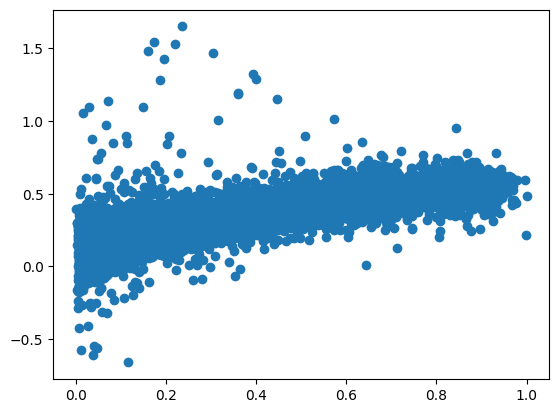

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

DECISION TREE REGRESSOR

In [ ]:
from sklearn import tree

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
param_grid2={"min_samples_split":np.arange(10,12),
            "min_samples_leaf":np.arange(10,12),
            "max_depth":np.arange(6,8)}

In [ ]:
grid_cv2=GridSearchCV(dt,param_grid2,cv=kf,scoring="r2",n_jobs=-1)

In [ ]:
grid_cv2.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([6, 7]),
                         'min_samples_leaf': array([10, 11]),
                         'min_samples_split': array([10, 11])},
             scoring='r2')

In [ ]:
grid_cv2.best_score_

np.float64(0.71408849519336)

In [ ]:
grid_cv2.best_params_

{'max_depth': np.int64(7),
 'min_samples_leaf': np.int64(11),
 'min_samples_split': np.int64(11)}

In [ ]:
grid_cv2.best_estimator_

DecisionTreeRegressor(max_depth=np.int64(7), min_samples_leaf=np.int64(11),
                      min_samples_split=np.int64(11))

In [ ]:
dt_model=DecisionTreeRegressor(max_depth=4,min_samples_leaf=10,min_samples_split=30)

In [ ]:

dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)

In [ ]:
dt_r2train=dt_model.score(x_train,y_train)

r2_score_train.append(dt_r2train)
dt_r2train

0.6414184824954032

In [ ]:
dt_r2test=dt_model.score(x_test,y_test)
r2_score_test.append(dt_r2test)
dt_r2test

0.6327833001836218

In [ ]:
y_pred1=dt_model.predict(x_test)

In [ ]:
dt_rmse=mean_squared_error(y_test,y_pred1)
dt_r2=r2_score(y_test,y_pred1)
dt_mae=mean_absolute_error(y_test,y_pred1)
dt_mape=mean_absolute_percentage_error(y_test,y_pred1)

In [ ]:
print("RMSE:",dt_rmse)
rmse.append(dt_rmse)
print("MSE:",dt_r2)
mse.append(dt_r2)
print("MAE:",dt_mae)
mae.append(dt_mae)
print("MAPE:",dt_mape)
mape.append(dt_mape)

RMSE: 0.011239260443166393
MSE: 0.6327833001836218
MAE: 0.07039746713016826
MAPE: 0.7117107462820887


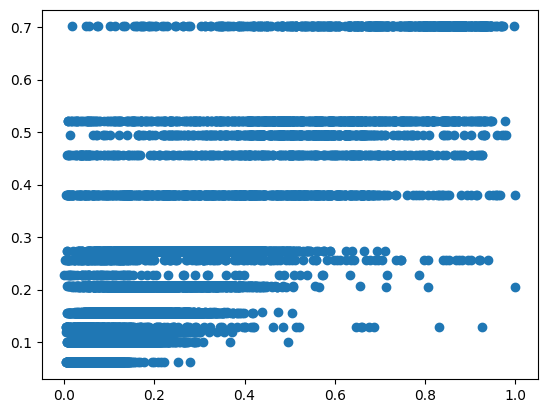

In [ ]:
plt.scatter(y_test,y_pred1)
plt.show()

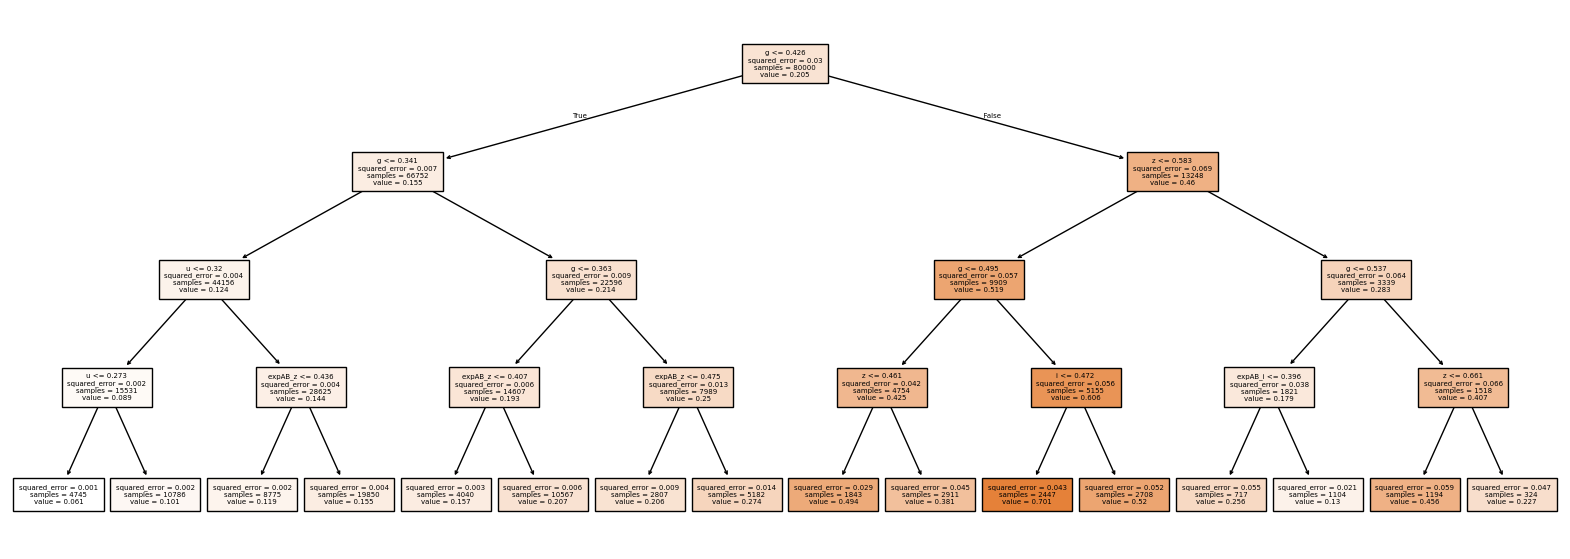

In [ ]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=x.columns,filled=True,fontsize=5)
plt.show()

RANDOM FOREST REGRESSOR

In [ ]:
#param_grid={"n_estimators":np.arange(20,201,20),
 #           "min_samples_split":np.arange(10,51,10),
  #          "min_samples_leaf":np.arrage(10,101,20),
   #         "max_depth":np.arange(3,15)}

param_grid = {
    "n_estimators": [50,100],
    "min_samples_split": [10],
    "min_samples_leaf": [10],
    "max_depth": [5,7],
}
# 2 × 2 × 2 × 2 = 16 combinations

In [ ]:
rf=RandomForestRegressor()

In [ ]:
grid_cv1=GridSearchCV(rf,param_grid,cv=kf,scoring="r2",n_jobs=-1)

In [ ]:
grid_cv1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'min_samples_leaf': [10],
                         'min_samples_split': [10], 'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
grid_cv1.best_score_

np.float64(0.749015340216285)

In [ ]:
grid_cv1.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
grid_cv1.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=10)

In [ ]:
rf_model=RandomForestRegressor(max_depth=4,min_samples_leaf=40,min_samples_split=10,n_estimators=10)

In [ ]:

rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,
                      n_estimators=10)

In [ ]:
rf_r2_train=rf_model.score(x_train,y_train)
r2_score_train.append(rf_r2_train)
rf_r2_train

0.6601145105676779

In [ ]:
rf_r2_test=rf_model.score(x_test,y_test)
r2_score_test.append(rf_r2_test)
rf_r2_test

0.6497229074809308

In [ ]:
y_pred2=rf_model.predict(x_test)


In [ ]:
rf_rmse=mean_squared_error(y_test,y_pred2)
rf_r2=r2_score(y_test,y_pred2)
rf_mae=mean_absolute_error(y_test,y_pred2)
rf_mape=mean_absolute_percentage_error(y_test,y_pred2)

In [ ]:
print("RMSE:",rf_rmse)
rmse.append(rf_rmse)
print("MSE:",rf_r2)
mse.append(rf_r2)
print("MAE:",rf_mae)
mae.append(rf_mae)
print("MAPE:",rf_mape)
mape.append(rf_mape)

RMSE: 0.010720796390974272
MSE: 0.6497229074809308
MAE: 0.06907034919412103
MAPE: 0.7092464914321425


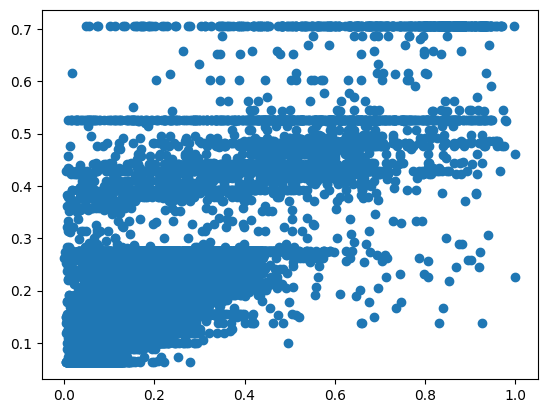

In [ ]:
plt.scatter(y_test,y_pred2)
plt.show()

ADA BOOSTER

In [ ]:
ada=AdaBoostRegressor()

In [ ]:
kf=KFold(n_splits=5)

In [ ]:
#param_grid={"n_estimators":np_arange(10,101,10),
#           "learning_rate":np.arange(0.05,1,0.05),
#}

param_grid={"n_estimators":np.arange(50,101,50),
           "learning_rate":[0.05,0.1,0.2,0.5]
}

In [ ]:
grid_cv=GridSearchCV(ada,param_grid,cv=kf,scoring="r2",n_jobs=-1)

In [ ]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': array([ 50, 100])},
             scoring='r2')

In [ ]:
ada_model=AdaBoostRegressor(learning_rate=0.05,n_estimators=20,random_state=42)

In [ ]:


ada_model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=20, random_state=42)

In [ ]:
adr2_train=ada_model.score(x_train,y_train)
r2_score_train.append(adr2_train)
adr2_train

0.6143959062853332

In [ ]:
adr2_test=ada_model.score(x_test,y_test)
r2_score_test.append(adr2_test)
adr2_test

0.6059904279473707

In [ ]:
y_pred3=ada_model.predict(x_test)

In [ ]:
ad_rmse=mean_squared_error(y_test,y_pred3)
ad_r2=r2_score(y_test,y_pred3)
ad_mae=mean_absolute_error(y_test,y_pred3)
ad_mape=mean_absolute_percentage_error(y_test,y_pred3)

In [ ]:
print("RMSE:",ad_rmse)
rmse.append(ad_rmse)
print("MSE:",ad_r2)
mse.append(ad_r2)
print("MAE:",ad_mae)
mae.append(ad_mae)
print("MAPE:",ad_mape)
mape.append(ad_mape)

RMSE: 0.01205929958962756
MSE: 0.6059904279473707
MAE: 0.07420567663945184
MAPE: 0.802741662655541


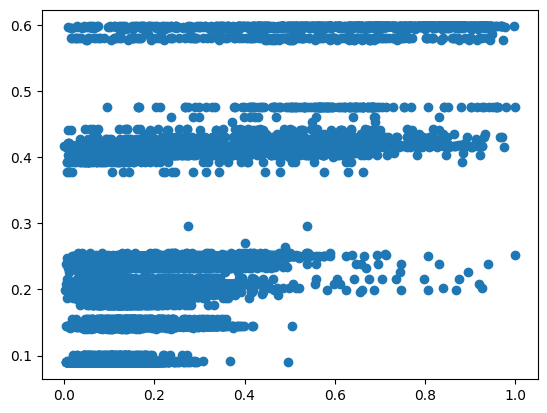

In [ ]:
plt.scatter(y_test,y_pred3)
plt.show()


KNN

In [ ]:
r2_scores=[]
for k in range(2,25):
  knn_score=cross_val_score(KNeighborsRegressor(k),x_train,y_train,scoring="r2",cv=kf,n_jobs=-1)
  r2_scores.append(np.mean(knn_score))

In [ ]:
for k in range(2,25):
  print("number of neighbours:",k,":",r2_scores[k-2])

number of neighbours: 2 : 0.405323020771843
number of neighbours: 3 : 0.4616262867307597
number of neighbours: 4 : 0.48770654288653503
number of neighbours: 5 : 0.5015242644843798
number of neighbours: 6 : 0.5110192176371602
number of neighbours: 7 : 0.517118130769624
number of neighbours: 8 : 0.5211930262405305
number of neighbours: 9 : 0.5230589025513638
number of neighbours: 10 : 0.5246691906204825
number of neighbours: 11 : 0.5264444272424673
number of neighbours: 12 : 0.5270911072658706
number of neighbours: 13 : 0.5274367054225472
number of neighbours: 14 : 0.5271918541755672
number of neighbours: 15 : 0.52764472215168
number of neighbours: 16 : 0.5272609360076828
number of neighbours: 17 : 0.5272080694819528
number of neighbours: 18 : 0.5269036941317558
number of neighbours: 19 : 0.5264942955786287
number of neighbours: 20 : 0.5260763051366942
number of neighbours: 21 : 0.5257321546844407
number of neighbours: 22 : 0.5254249120786849
number of neighbours: 23 : 0.525113874180126


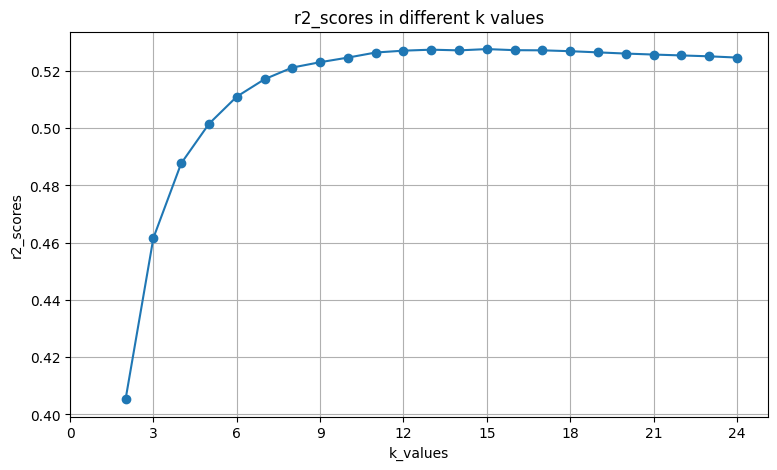

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [ ]:
k=7
kn_model=KNeighborsRegressor(k).fit(x_train,y_train)
y_pred4=kn_model.predict(x_test)

In [ ]:
knr2_train=kn_model.score(x_train,y_train)
r2_score_train.append(knr2_train)
knr2_test=kn_model.score(x_test,y_test)
r2_score_test.append(knr2_test)

In [ ]:
#print("Model adjusted r2 score training data :",adjusted_r2_score(knn_model,x_train,y_train))
#print("Model adjusted r2 score on test data :",adjusted_r2_score(knn_model,x_test,y_test))

In [ ]:
print("accuracy_train:",knr2_train)
print("accuracy_test:",knr2_test)

accuracy_train: 0.6455888235546663
accuracy_test: 0.5256932717769623


In [ ]:
kn_rmse=mean_squared_error(y_test,y_pred4)
kn_r2=r2_score(y_test,y_pred4)
kn_mae=mean_absolute_error(y_test,y_pred4)
kn_mape=mean_absolute_percentage_error(y_test,y_pred4)

In [ ]:
print("RMSE:",kn_rmse)
rmse.append(kn_rmse)
print("MSE:",kn_r2)
mse.append(kn_r2)
print("MAE:",kn_mae)
mae.append(kn_mae)
print("MAPE:",kn_mape)
mape.append(kn_mape)

RMSE: 0.014516923797611832
MSE: 0.5256932717769623
MAE: 0.0768654256148718
MAPE: 0.8139399706791779


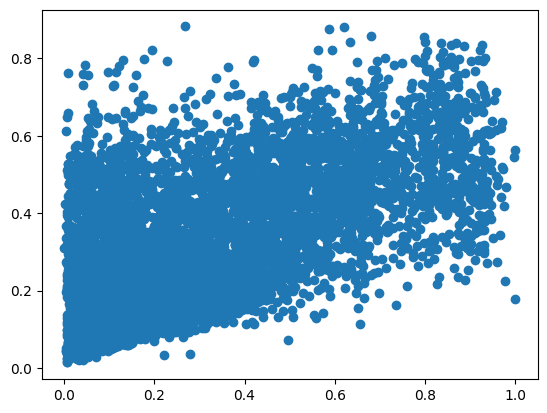

In [ ]:
plt.scatter(y_test,y_pred4)
plt.show()

STACKING

In [ ]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",kn_model))
level1.append(("svr",SVR()))
level1.append(("dt",dt_model))
level1.append(("rnd",rf_model))
level1.append(("ada",ada_model))
level2=LinearRegression()
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf,n_jobs=-1)

In [ ]:
level1

[('lr', LinearRegression()),
 ('knn', KNeighborsRegressor(n_neighbors=7)),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)),
 ('rnd',
  RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,
                        n_estimators=10)),
 ('ada',
  AdaBoostRegressor(learning_rate=0.05, n_estimators=20, random_state=42))]

In [ ]:
st_model=stack_model.fit(x_train,y_train)
y_pred_st=st_model.predict(x_test)

In [118]:
score=cross_val_score(stack_model,x_train,y_train,scoring="r2",cv=kf)

In [119]:
print("Rscore:",np.mean(score))

Rscore: 0.7088032321597842


In [120]:
str2_train=st_model.score(x_train,y_train)
r2_score_train.append(str2_train)
str2_test=st_model.score(x_test,y_test)
r2_score_test.append(str2_test)

In [ ]:
print("R-square train data:",str2_train)
print("R-square test data:",str2_test)

In [ ]:
st_rmse=mean_squared_error(y_test,y_pred_st)
st_r2=r2_score(y_test,y_pred_st)
st_mae=mean_absolute_error(y_test,y_pred_st)
st_mape=mean_absolute_percentage_error(y_test,y_pred_st)

In [123]:
print("RMSE:",st_rmse)
rmse.append(st_rmse)
print("MSE:",st_r2)
mse.append(st_r2)
print("MAE:",st_mae)
mae.append(st_mae)
print("MAPE:",st_mape)
mape.append(st_mape)

RMSE: 0.00891951305601525
MSE: 0.7085756518445574
MAE: 0.05987292121086294
MAPE: 0.6008990711719815


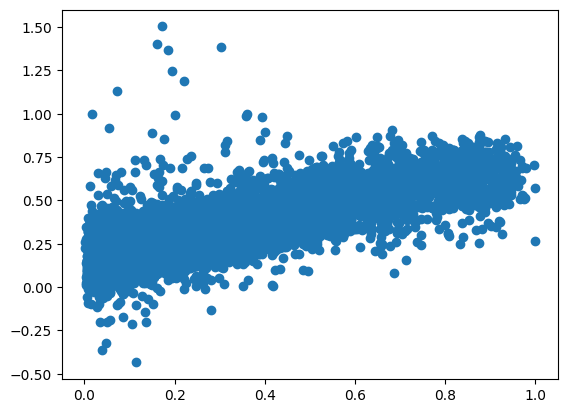

In [124]:
plt.scatter(y_test,y_pred_st)
plt.show()

SUMMARY(OF RED SHIFT ESTIMATION):

In [125]:
model_list=["Linear Regression","Decision Tree Regression","Random Forest Regressor","Adaoost Regressor","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Test)","r2 Score","RMSE","MSE","MAE","MAPE"]

In [126]:
mse

[0.01173220496846868,
 0.6327833001836218,
 0.6497229074809308,
 0.6059904279473707,
 0.5256932717769623,
 0.7085756518445574]

In [127]:
rmse

[0.01173220496846868,
 0.011239260443166393,
 0.010720796390974272,
 0.01205929958962756,
 0.014516923797611832,
 0.00891951305601525]

In [128]:
mae

[0.06851857759065441,
 0.07039746713016826,
 0.06907034919412103,
 0.07420567663945184,
 0.0768654256148718,
 0.05987292121086294]

In [129]:
rfinal_results=pd.DataFrame()
for i in range(0,len(model_list)):
  ab=[[model_list[i],r2_score_train[i],r2_score_test[i],rmse[i],mse[i],mae[i],mape[i]]]
  new=pd.DataFrame(ab)
  rfinal_results=pd.concat([rfinal_results,new],axis=0)
rfinal_results.columns=metric_list
rfinal_results=rfinal_results.reset_index(drop=True)
rfinal_results

Models  r2 Score(Train)  r2 Score      RMSE       MSE  \
0         Linear Regression         0.649842  0.649369  0.011732  0.011732   
1  Decision Tree Regression         0.641418  0.632783  0.011239  0.632783   
2   Random Forest Regressor         0.660115  0.649723  0.010721  0.649723   
3         Adaoost Regressor         0.614396  0.605990  0.012059  0.605990   
4            KNN Regression         0.645589  0.525693  0.014517  0.525693   
5        Stacked Regression         0.723904  0.708576  0.008920  0.708576   

        MAE      MAPE  
0  0.068519  0.747834  
1  0.070397  0.711711  
2  0.069070  0.709246  
3  0.074206  0.802742  
4  0.076865  0.813940  
5  0.059873  0.600899

In [130]:
rvse_list=list(rfinal_results['Models'])
rvse_list

['Linear Regression',
 'Decision Tree Regression',
 'Random Forest Regressor',
 'Adaoost Regressor',
 'KNN Regression',
 'Stacked Regression']

In [131]:
rvse_list.reverse()

In [132]:
rvse_list

['Stacked Regression',
 'KNN Regression',
 'Adaoost Regressor',
 'Random Forest Regressor',
 'Decision Tree Regression',
 'Linear Regression']

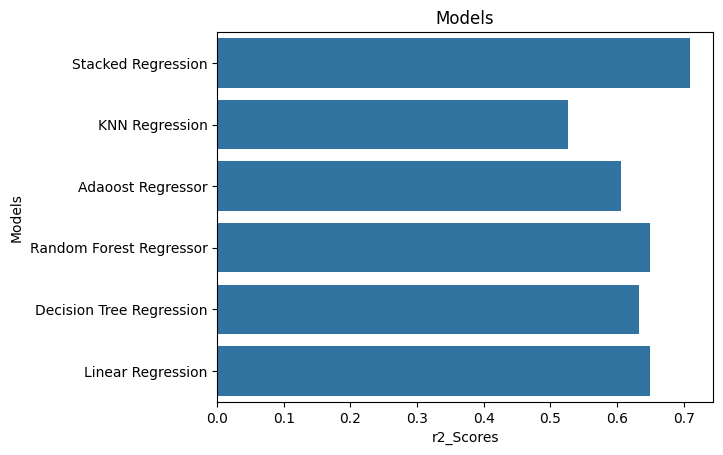

In [138]:
models=rfinal_results['Models']
test_score=rfinal_results['r2 Score']
#ab=round(test_score.reverse(),4)
#Explicitly set x and y arguments
sns.barplot(x=test_score,y=models,orient='h',order=rvse_list)
plt.xlabel('r2_Scores')
#for i,v in enumerate(test_score):
#  plt.text(v,i,str(v),ha='left',va='center')
plt.title('Models')
plt.show()

Final Model

In [139]:
#redshift_model=st_model

In [140]:
#import joblib

# Save the model
#joblib.dump(redshift_model, 'redshift_model.pkl')

In [141]:
#from google.colab import files
#files.download("redshift_model.pkl")

LOGISTIC REGRESSION(OF MORPHOLOGY)

In [142]:
x = red_df.drop('morphology', axis=1)
y = red_df['morphology']

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [144]:
log_model = LogisticRegression(max_iter=1500)  # max_iter helps avoid convergence issues

In [145]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

In [146]:
my_pred1 = log_model.predict(x_test)

In [147]:
macc_train=[]
macc_test=[]
mrecall=[]
mf1=[]
mprecision=[]

In [148]:
acc_tr= accuracy_score(y_train[:len(my_pred1)], my_pred1)
acc_te= accuracy_score(y_test, my_pred1)
Precision= precision_score(y_test, my_pred1, average='weighted')
Recall= recall_score(y_test, my_pred1, average='weighted')
f1= f1_score(y_test, my_pred1, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.3368693695844297
Recall : 0.3345
F1 0.26894756391313146


In [149]:
print("Accuracy:", accuracy_score(y_test, my_pred1))
print("Classification Report:\n", classification_report(y_test, my_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, my_pred1))

Accuracy: 0.3345
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.69      0.45     10076
         1.0       0.33      0.28      0.30      9956
         2.0       0.34      0.03      0.05      9968

    accuracy                           0.33     30000
   macro avg       0.34      0.33      0.27     30000
weighted avg       0.34      0.33      0.27     30000

Confusion Matrix:
 [[6998 2820  258]
 [6933 2766  257]
 [6897 2800  271]]


DECISION TREE CLASSIFICATION

In [150]:
mdt = DecisionTreeClassifier(random_state=42)

In [151]:
mkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [152]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # or 'log_loss' for probabilistic output
}

In [153]:
grid_search = GridSearchCV(estimator=mdt,
                           param_grid=param_grid,
                           cv=mkf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)




In [154]:
# Define features and targeT
x = red_df.drop('morphology', axis=1)
y = red_df['morphology']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [155]:
grid_search.fit(x_train, y_train.astype(int))  # Make sure y is integer type

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [156]:
grid_search.best_score_

grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [287]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [157]:
best_model = grid_search.best_estimator_

In [158]:
my_pred2 = best_model.predict(x_test)

In [159]:
acc_tr= accuracy_score(y_train[:len(my_pred2)], my_pred2)
acc_te= accuracy_score(y_test, my_pred2)
Precision= precision_score(y_test, my_pred2, average='weighted')
Recall= recall_score(y_test, my_pred2, average='weighted')
f1= f1_score(y_test, my_pred2, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.3382428011905333
Recall : 0.33736666666666665
F1 0.2548239249126935


In [160]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test.astype(int), my_pred2))
print("Classification Report:\n", classification_report(y_test.astype(int), my_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test.astype(int), my_pred2))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.33736666666666665
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.77      0.47     10076
           1       0.34      0.22      0.27      9956
           2       0.34      0.01      0.02      9968

    accuracy                           0.34     30000
   macro avg       0.34      0.34      0.25     30000
weighted avg       0.34      0.34      0.25     30000

Confusion Matrix:
 [[7776 2179  121]
 [7615 2219  122]
 [7624 2218  126]]


RANDOM FOREST CLASSIFICATION

In [161]:
mrf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [162]:
param_grid = {
    'n_estimators': [50,100],              # number of trees
    'max_depth': [10],                   # maximum tree depth
    'min_samples_split': [2],             # min samples to split a node
    'min_samples_leaf': [1, 2],              # min samples at a leaf node
    'criterion': ['gini', 'entropy']         # splitting criterion
}

In [163]:
# Define features and targeT
x = red_df.drop('morphology', axis=1)
y = red_df['morphology']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [164]:
grid_search = GridSearchCV(estimator=mrf,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

In [165]:

grid_search.fit(x_train, y_train.astype(int))  # Ensure labels are integers

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=RandomState(MT19937) at 0x7AE44653B040,
   shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [166]:
grid_search.best_score_

grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)

In [288]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [167]:
best_model = grid_search.best_estimator_

In [168]:
my_pred3 = best_model.predict(x_test)

In [169]:
acc_tr= accuracy_score(y_train[:len(my_pred3)], my_pred3)
acc_te= accuracy_score(y_test, my_pred3)
Precision= precision_score(y_test, my_pred3, average='weighted')
Recall= recall_score(y_test, my_pred3, average='weighted')
f1= f1_score(y_test, my_pred3, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.33490843822454597
Recall : 0.3359333333333333
F1 0.2883826475523327


In [170]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test.astype(int), my_pred3))
print("Classification Report:\n", classification_report(y_test.astype(int), my_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test.astype(int), my_pred3))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.3359333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.68      0.45     10076
           1       0.33      0.24      0.28      9956
           2       0.34      0.08      0.13      9968

    accuracy                           0.34     30000
   macro avg       0.33      0.33      0.29     30000
weighted avg       0.33      0.34      0.29     30000

Confusion Matrix:
 [[6862 2395  819]
 [6744 2379  833]
 [6710 2421  837]]


ADABOOST CLASSIFICATION

In [171]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [172]:
mada=AdaBoostClassifier()

In [173]:
# Define features and targeT
x = red_df.drop('morphology', axis=1)
y = red_df['morphology']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [174]:
grid_search = GridSearchCV(
    mada,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [175]:
grid_search.best_score_

grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1)

In [289]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [176]:
best_model = grid_search.best_estimator_

In [177]:
my_pred4 = best_model.predict(x_test)

In [178]:
acc_tr= accuracy_score(y_train[:len(my_pred4)], my_pred4)
acc_te= accuracy_score(y_test, my_pred4)
Precision= precision_score(y_test, my_pred4, average='weighted')
Recall= recall_score(y_test, my_pred4, average='weighted')
f1= f1_score(y_test, my_pred4, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Accuracy :",acc_te)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Accuracy : 0.3358
Precision : 0.18654362234596306
Recall : 0.3358
F1 0.16899282639261123


In [179]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", best_model.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, my_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, my_pred4))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.3358
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      1.00      0.50     10076
         1.0       0.22      0.00      0.00      9956
         2.0       0.00      0.00      0.00      9968

    accuracy                           0.34     30000
   macro avg       0.19      0.33      0.17     30000
weighted avg       0.19      0.34      0.17     30000

Confusion Matrix:
 [[10072     4     0]
 [ 9954     2     0]
 [ 9965     3     0]]


KNN

In [180]:
mkf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [181]:
x = red_df.drop("morphology", axis=1)  # Replace with your actual target
y = red_df["morphology"]

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [183]:
accuracy_scores = []

for k in range(2, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=mkf, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))


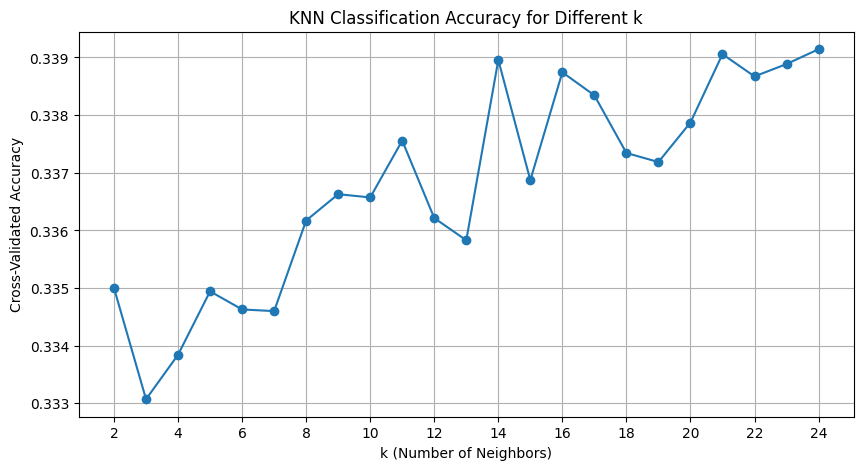

In [184]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), accuracy_scores, marker='o')
plt.title("KNN Classification Accuracy for Different k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.xticks(range(2, 25, 2))
plt.show()


In [185]:
best_k = 14
print(f"Best k: {best_k}")

Best k: 14


In [186]:
m_knn = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)

In [187]:
m_knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=14)

In [188]:
my_pred5 = m_knn.predict(x_test)

In [189]:
acc_tr= accuracy_score(y_train[:len(my_pred5)], my_pred5)
acc_te= accuracy_score(y_test, my_pred5)
Precision= precision_score(y_test, my_pred5, average='weighted')
Recall= recall_score(y_test, my_pred5, average='weighted')
f1= f1_score(y_test, my_pred5, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.3341366666610037
Recall : 0.3353
F1 0.33147314964685215


In [190]:
print("Accuracy:", accuracy_score(y_test, my_pred5))
print("Classification Report:\n", classification_report(y_test, my_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, my_pred5))

Accuracy: 0.3353
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.42      0.38     10133
         1.0       0.34      0.33      0.34     10005
         2.0       0.33      0.25      0.28      9862

    accuracy                           0.34     30000
   macro avg       0.33      0.33      0.33     30000
weighted avg       0.33      0.34      0.33     30000

Confusion Matrix:
 [[4276 3330 2527]
 [4133 3345 2527]
 [4166 3258 2438]]


STACKING

In [191]:
level1 = []
level1.append(("log_model", LogisticRegression(max_iter=1500)))
level1.append(("msvm", SVC()))
level1.append(("mdt", DecisionTreeClassifier()))
level1.append(("mada", AdaBoostClassifier()))
level1.append(("mknn", KNeighborsClassifier()))


In [192]:
level2 = LogisticRegression()

In [193]:
mstack_model = StackingClassifier(
    estimators=level1,
    final_estimator=level2,
    cv=3,  # or use StratifiedKFold
    n_jobs=-1
)

In [198]:
cv_scores = cross_val_score(mstack_model, x_train, y_train, cv=mkf, scoring='accuracy',n_jobs=-1)
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validated Accuracy Scores: [0.33521899 0.33776197 0.33647624]
Mean Accuracy: 0.33648573238198054


In [199]:
mstack_model.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('log_model', LogisticRegression(max_iter=1500)),
                               ('msvm', SVC()),
                               ('mdt', DecisionTreeClassifier()),
                               ('mada', AdaBoostClassifier()),
                               ('mknn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [200]:
my_pred6 = mstack_model.predict(x_test)

In [201]:
acc_tr= accuracy_score(y_train[:len(my_pred6)], my_pred6)
acc_te= accuracy_score(y_test, my_pred6)
Precision= precision_score(y_test, my_pred6, average='weighted')
Recall= recall_score(y_test, my_pred6, average='weighted')
f1= f1_score(y_test, my_pred6, average='weighted')

macc_train.append(acc_tr)
macc_test.append(acc_te)
mrecall.append(Recall)
mprecision.append(Precision)
mf1.append(f1)

print("Accuracy :",acc_te)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Accuracy : 0.3339666666666667
Precision : 0.32769248369303017
Recall : 0.3339666666666667
F1 0.28242392796332394


In [202]:
print("Test Accuracy:", accuracy_score(y_test, my_pred6))
print("Classification Report:\n", classification_report(y_test, my_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, my_pred6))

Test Accuracy: 0.3339666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.68      0.45     10133
         1.0       0.33      0.25      0.29     10005
         2.0       0.32      0.06      0.11      9862

    accuracy                           0.33     30000
   macro avg       0.33      0.33      0.28     30000
weighted avg       0.33      0.33      0.28     30000

Confusion Matrix:
 [[6855 2593  685]
 [6794 2539  672]
 [6681 2556  625]]


SUMMARY

In [203]:
mmodel_list = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost","KNN", "Stacking"]

# Metric labels
mmetric_list = ["Models", "Accuracy (Train)", "Accuracy (Test)", "Precision", "Recall", "F1-Score"]

In [206]:
print("Accuracy :",macc_test)
print("Precision :",mprecision)
print("Recall :",mrecall)
print("F1",mf1)

Accuracy : [0.3345, 0.33736666666666665, 0.3359333333333333, 0.3358, 0.3353, 0.3339666666666667]
Precision : [0.3368693695844297, 0.3382428011905333, 0.33490843822454597, 0.18654362234596306, 0.3341366666610037, 0.32769248369303017]
Recall : [0.3345, 0.33736666666666665, 0.3359333333333333, 0.3358, 0.3353, 0.3339666666666667]
F1 [0.26894756391313146, 0.2548239249126935, 0.2883826475523327, 0.16899282639261123, 0.33147314964685215, 0.28242392796332394]


In [209]:
# Create dataframe
mfinal_results = pd.DataFrame()
for i in range(len(model_list)):
    row = [[model_list[i], macc_train[i], macc_test[i], mprecision[i], mrecall[i], mf1[i]]]
    df = pd.DataFrame(row)
    mfinal_results = pd.concat([mfinal_results, df], axis=0)

# Set column names
mfinal_results.columns = mmetric_list
mfinal_results = mfinal_results.reset_index(drop=True)
print(mfinal_results)

                     Models  Accuracy (Train)  Accuracy (Test)  Precision  \
0         Linear Regression          0.342800         0.334500   0.336869   
1  Decision Tree Regression          0.341233         0.337367   0.338243   
2   Random Forest Regressor          0.343667         0.335933   0.334908   
3         Adaoost Regressor          0.341167         0.335800   0.186544   
4            KNN Regression          0.333333         0.335300   0.334137   
5        Stacked Regression          0.341433         0.333967   0.327692   

     Recall  F1-Score  
0  0.334500  0.268948  
1  0.337367  0.254824  
2  0.335933  0.288383  
3  0.335800  0.168993  
4  0.335300  0.331473  
5  0.333967  0.282424  


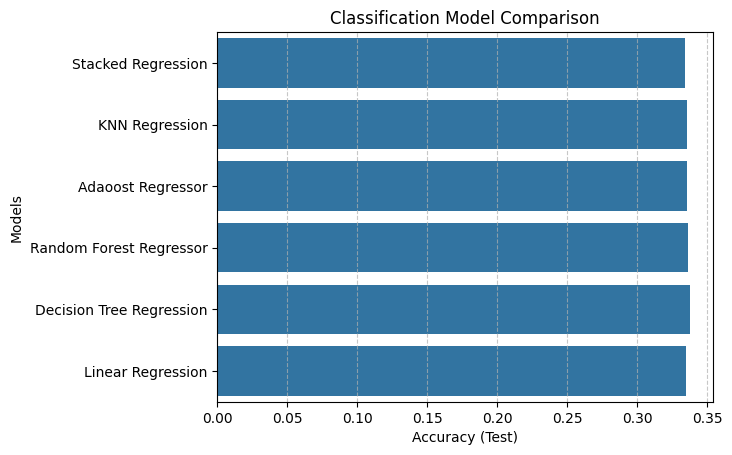

In [210]:
# Bar plot sorted by test accuracy
mrvse_list = list(mfinal_results['Models'])
mrvse_list.reverse()  # reverse for horizontal bar plot

mmodels = mfinal_results['Models']
test_score = mfinal_results['Accuracy (Test)']

sns.barplot(x=test_score, y=mmodels, orient='h', order=mrvse_list)
plt.xlabel('Accuracy (Test)')
plt.title('Classification Model Comparison')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


FINAL MORPHOLOGY MODEL

In [211]:
#morphology_model=m_knn

In [212]:
#joblib.dump(morphology_model, 'morphology_model.pkl')

In [213]:
#from google.colab import files
#files.download("morphology_model.pkl")

LOGISTIC REGRESSION(OF AGN IDENTIFICATION)

In [214]:
x = red_df.drop('agni', axis=1)
y = red_df['agni']

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [216]:
agnlog_model = LogisticRegression(max_iter=1500)  # max_iter helps avoid convergence issues

In [217]:
agnlog_model.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

In [218]:
agny_pred1 = agnlog_model.predict(x_test)

In [219]:
agnacc_train=[]
agnacc_test=[]
agnrecall=[]
agnf1=[]
agnprecision=[]

In [220]:
acc_tr= accuracy_score(y_train[:len(agny_pred1)], agny_pred1)
acc_te= accuracy_score(y_test, agny_pred1)
Precision= precision_score(y_test, agny_pred1, average='weighted')
Recall= recall_score(y_test, agny_pred1, average='weighted')
f1= f1_score(y_test, agny_pred1, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.49931860935648636
Recall : 0.49916666666666665
F1 0.49812004312760677


In [221]:
print("Accuracy:", accuracy_score(y_test, agny_pred1))
print("Classification Report:\n", classification_report(y_test, agny_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, agny_pred1))

Accuracy: 0.49916666666666665
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.45      0.48     15050
         1.0       0.50      0.55      0.52     14950

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

Confusion Matrix:
 [[6827 8223]
 [6802 8148]]


DECISION TREE CLASSIFICATION

In [222]:
agndt = DecisionTreeClassifier(random_state=42)

In [223]:
agnkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [224]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # or 'log_loss' for probabilistic output
}

In [225]:
grid_search = GridSearchCV(estimator=agndt,
                           param_grid=param_grid,
                           cv=agnkf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)




In [226]:
# Define features and targeT
x = red_df.drop('agni', axis=1)
y = red_df['agni']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [227]:
grid_search.fit(x_train, y_train.astype(int))  # Make sure y is integer type

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [228]:
grid_search.best_score_

grid_search.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [290]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [229]:
best_model = grid_search.best_estimator_

In [230]:
agny_pred2 = best_model.predict(x_test)

In [231]:
acc_tr= accuracy_score(y_train[:len(agny_pred2)], agny_pred2)
acc_te= accuracy_score(y_test, agny_pred2)
Precision= precision_score(y_test, agny_pred2, average='weighted')
Recall= recall_score(y_test, agny_pred2, average='weighted')
f1= f1_score(y_test, agny_pred2, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.50649552016979
Recall : 0.5059
F1 0.5009957584285615


In [232]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test.astype(int), agny_pred2))
print("Classification Report:\n", classification_report(y_test.astype(int), agny_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test.astype(int), agny_pred2))

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.5059
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.41      0.45     15050
           1       0.50      0.61      0.55     14950

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.50     30000
weighted avg       0.51      0.51      0.50     30000

Confusion Matrix:
 [[6126 8924]
 [5899 9051]]


RANDOM FOREST CLASSIFICATION

In [233]:
agnrf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [295]:
param_grid = {
    'n_estimators': [50,100],              # number of trees
    'max_depth': [10],                   # maximum tree depth
    'min_samples_split': [2],             # min samples to split a node
    'min_samples_leaf': [1, 2],              # min samples at a leaf node
    'criterion': ['gini', 'entropy']         # splitting criterion
}

In [296]:
# Define features and targeT
x = red_df.drop('agni', axis=1)
y = red_df['agni']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [297]:
grid_search = GridSearchCV(estimator=agnrf,
                           param_grid=param_grid,
                           cv=agnkf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

In [298]:

grid_search.fit(x_train, y_train.astype(int))  # Ensure labels are integers

Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
agny_pred3 = best_model.predict(x_test)

In [241]:
acc_tr= accuracy_score(y_train[:len(agny_pred3)], agny_pred3)
acc_te= accuracy_score(y_test, agny_pred3)
Precision= precision_score(y_test, agny_pred3, average='weighted')
Recall= recall_score(y_test, agny_pred3, average='weighted')
f1= f1_score(y_test, agny_pred3, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.3378425981511476
Recall : 0.33886666666666665
F1 0.29763294799205237


In [242]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test.astype(int), agny_pred3))
print("Classification Report:\n", classification_report(y_test.astype(int), agny_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test.astype(int), agny_pred3))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.33886666666666665
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.67      0.45     10076
           1       0.34      0.24      0.28      9956
           2       0.34      0.11      0.16      9968

    accuracy                           0.34     30000
   macro avg       0.34      0.34      0.30     30000
weighted avg       0.34      0.34      0.30     30000

Confusion Matrix:
 [[6725 2328 1023]
 [6515 2394 1047]
 [6559 2362 1047]]


ADABOOST CLASSIFICATION

In [243]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [244]:
agnada=AdaBoostClassifier()

In [245]:
# Define features and targeT
x = red_df.drop('agni', axis=1)
y = red_df['agni']

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [246]:
grid_search = GridSearchCV(
    agnada,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
agny_pred4 = best_model.predict(x_test)

In [ ]:
acc_tr= accuracy_score(y_train[:len(agny_pred4)], agny_pred4)
acc_te= accuracy_score(y_test, agny_pred4)
Precision= precision_score(y_test, agny_pred4, average='weighted')
Recall= recall_score(y_test, agny_pred4, average='weighted')
f1= f1_score(y_test, agny_pred4, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", best_model.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, agny_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, agny_pred4))

KNN

In [ ]:
agnkf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
x = red_df.drop("agni", axis=1)  # Replace with your actual target
y = red_df["agni"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [257]:
accuracy_scores = []

for k in range(2, 25):
    agnknn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(agnknn, x_train, y_train, cv=agnkf, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))


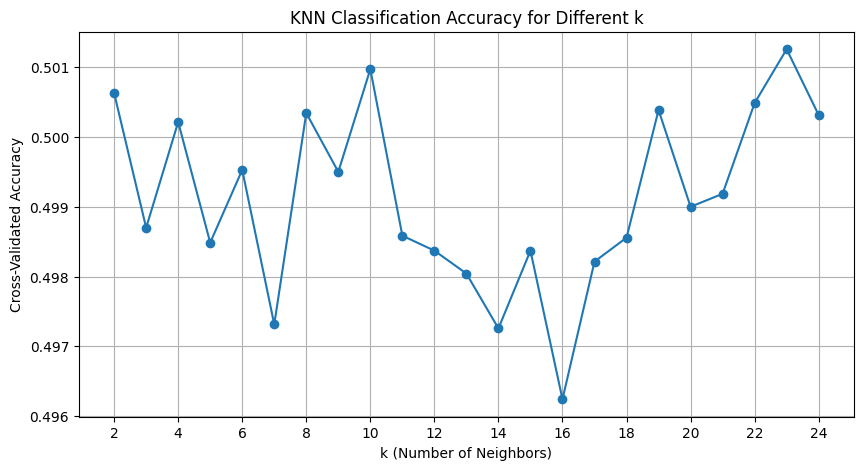

In [274]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), accuracy_scores, marker='o')
plt.title("KNN Classification Accuracy for Different k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.xticks(range(2, 25, 2))
plt.show()


In [275]:
best_k = 10
print(f"Best k: {best_k}")

Best k: 10


In [276]:
agn_knn = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)

In [277]:
agn_knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [278]:
agny_pred5 = agn_knn.predict(x_test)

In [279]:
acc_tr= accuracy_score(y_train[:len(agny_pred5)], agny_pred5)
acc_te= accuracy_score(y_test, agny_pred5)
Precision= precision_score(y_test, agny_pred5, average='weighted')
Recall= recall_score(y_test, agny_pred5, average='weighted')
f1= f1_score(y_test, agny_pred5, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.5034303187063769
Recall : 0.5032666666666666
F1 0.4957487905042668


In [280]:
print("Accuracy:", accuracy_score(y_test, agny_pred5))
print("Classification Report:\n", classification_report(y_test, agny_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, agny_pred5))

Accuracy: 0.5032666666666666
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.63      0.56     15005
         1.0       0.50      0.38      0.43     14995

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

Confusion Matrix:
 [[9383 5622]
 [9280 5715]]


STACKING

In [258]:
agnlevel1 = []
agnlevel1.append(("log_model", LogisticRegression(max_iter=1500)))
agnlevel1.append(("mknn", KNeighborsClassifier()))
agnlevel1.append(("msvm", SVC()))
agnlevel1.append(("mdt", DecisionTreeClassifier()))
agnlevel1.append(("mada", AdaBoostClassifier()))


In [259]:
agnlevel2 = LogisticRegression()

In [260]:
agnstack_model = StackingClassifier(
    estimators=agnlevel1,
    final_estimator=agnlevel2,
    cv=3,  # or use StratifiedKFold
    n_jobs=-1
)

In [261]:
agncv_scores = cross_val_score(agnstack_model, x_train, y_train, cv=agnkf, scoring='accuracy',n_jobs=-1)
print("Cross-Validated Accuracy Scores:", agncv_scores)
print("Mean Accuracy:", agncv_scores.mean())

Cross-Validated Accuracy Scores: [0.49558584 0.4968071  0.50267861]
Mean Accuracy: 0.4983571824477435


In [263]:
agnstack_model.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('log_model', LogisticRegression(max_iter=1500)),
                               ('mknn', KNeighborsClassifier()),
                               ('msvm', SVC()),
                               ('mdt', DecisionTreeClassifier()),
                               ('mada', AdaBoostClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [264]:
agny_pred6 = agnstack_model.predict(x_test)

In [265]:
acc_tr= accuracy_score(y_train[:len(agny_pred6)], agny_pred6)
acc_te= accuracy_score(y_test, agny_pred6)
Precision= precision_score(y_test, agny_pred6, average='weighted')
Recall= recall_score(y_test, agny_pred6, average='weighted')
f1= f1_score(y_test, agny_pred6, average='weighted')

agnacc_train.append(acc_tr)
agnacc_test.append(acc_te)
agnrecall.append(Recall)
agnprecision.append(Precision)
agnf1.append(f1)

print("Precision :",Precision)
print("Recall :",Recall)
print("F1",f1)

Precision : 0.5041983994492957
Recall : 0.5042
F1 0.5041619062986199


In [266]:
print("Test Accuracy:", accuracy_score(y_test, agny_pred6))
print("Classification Report:\n", classification_report(y_test, agny_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, agny_pred6))

Test Accuracy: 0.5042
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.51      0.51     15005
         1.0       0.50      0.50      0.50     14995

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

Confusion Matrix:
 [[7697 7308]
 [7566 7429]]


SUMMARY

In [281]:
agnmodel_list = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost", "Stacking", "KNN"]

# Metric labels
agnmetric_list = ["Models", "Accuracy (Train)", "Accuracy (Test)", "Precision", "Recall", "F1-Score"]

In [282]:

print("Accuracy :",agnacc_test)
print("Precision :",agnprecision)
print("Recall :",agnrecall)
print("F1",agnf1)

Accuracy : [0.49916666666666665, 0.5059, 0.33886666666666665, 0.49833333333333335, 0.5042, 0.5032666666666666]
Precision : [0.49931860935648636, 0.50649552016979, 0.3378425981511476, 0.24833611111111112, 0.5041983994492957, 0.5034303187063769]
Recall : [0.49916666666666665, 0.5059, 0.33886666666666665, 0.49833333333333335, 0.5042, 0.5032666666666666]
F1 [0.49812004312760677, 0.5009957584285615, 0.29763294799205237, 0.3314831294030404, 0.5041619062986199, 0.4957487905042668]


In [284]:
# Create dataframe
agnfinal_results = pd.DataFrame()
for i in range(len(agnmodel_list)):
    row = [[agnmodel_list[i], agnacc_train[i], agnacc_test[i], agnprecision[i], agnrecall[i], agnf1[i]]]
    df = pd.DataFrame(row)
    agnfinal_results = pd.concat([agnfinal_results, df], axis=0)

# Set column names
agnfinal_results.columns = agnmetric_list
agnfinal_results = agnfinal_results.reset_index(drop=True)
print(agnfinal_results)

                Models  Accuracy (Train)  Accuracy (Test)  Precision  \
0  Logistic Regression          0.500933         0.499167   0.499319   
1        Decision Tree          0.498133         0.505900   0.506496   
2        Random Forest          0.340267         0.338867   0.337843   
3             AdaBoost          0.504300         0.498333   0.248336   
4             Stacking          0.497867         0.504200   0.504198   
5                  KNN          0.501067         0.503267   0.503430   

     Recall  F1-Score  
0  0.499167  0.498120  
1  0.505900  0.500996  
2  0.338867  0.297633  
3  0.498333  0.331483  
4  0.504200  0.504162  
5  0.503267  0.495749  


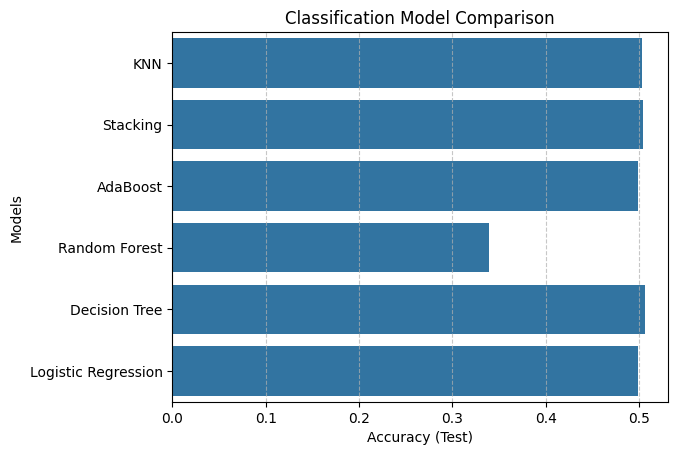

In [285]:
# Bar plot sorted by test accuracy
agnrvse_list = list(agnfinal_results['Models'])
agnrvse_list.reverse()  # reverse for horizontal bar plot

agnmodels = agnfinal_results['Models']
test_score = agnfinal_results['Accuracy (Test)']

sns.barplot(x=test_score, y=agnmodels, orient='h', order=agnrvse_list)
plt.xlabel('Accuracy (Test)')
plt.title('Classification Model Comparison')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


Final AGN model

In [ ]:
#agn_model=agnstack_model

In [ ]:
#joblib.dump(agn_model,"agn_model.pkl")

In [ ]:
#files.download("agn_model.pkl")